In [1]:
import pandas as pd
import os
 

# Specify the path to the extracted zip folder
extracted_folder_path = r'C:\Users\OsamaAl-Mofti\Downloads\secom'

 

# Load the SECOM data file
secom_data_path = os.path.join(extracted_folder_path, r'C:\Users\OsamaAl-Mofti\Downloads\secom\secom.data')
secom_data = pd.read_csv(secom_data_path, sep=' ', header=None)

 

# Load the SECOM labels file
secom_labels_path = os.path.join(extracted_folder_path, r'C:\Users\OsamaAl-Mofti\Downloads\secom\secom_labels.data')
secom_labels = pd.read_csv(secom_labels_path, sep=' ', header=None)

 

# Print the shape of the data and labels
print("SECOM data shape:", secom_data.shape)
print("SECOM labels shape:", secom_labels.shape)

SECOM data shape: (1567, 590)
SECOM labels shape: (1567, 2)


In [6]:
# Add column names to the data
column_names = ['feature_'+str(i) for i in range(1, len(secom_data.columns)+1)]
secom_data.columns = column_names
# Add column name to the labels
secom_labels.columns = ['label', 'time stamp']

# Combine the data and the labels using pd.concat
secom = pd.concat([secom_data, secom_labels], axis=1)
# assign column names
column_names = ['feature_'+str(i) for i in range(1, len(secom.columns)-1)]
column_names.extend(['pass/fail', 'timestamp'])
secom.columns = column_names
# Create separate date and time columns
secom['timestamp'] = pd.to_datetime(secom['timestamp'])
secom['date'] = secom['timestamp'].dt.date
secom['time'] = secom['timestamp'].dt.time
print(secom.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602      100.0   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294      100.0   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102      100.0   
3    2988.72    2479.90  2199.0333   909.7926     1.3204      100.0   
4    3032.24    2502.87  2233.3667  1326.5200     1.5334      100.0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_585  feature_586  \
0    97.6133     0.1242     1.5005      0.0162  ...       0.0035       2.3630   
1   102.3433     0.1247     1.4966     -0.0005  ...       0.0055       4.4447   
2    95.4878     0.1241     1.4436      0.0041  ...       0.0039       3.1745   
3   104.2367     0.1217     1.4882     -0.0124  ...       0.0025       2.0544   
4   100.3967     0.1235     1.5031     -0.0031  ...       0.1045      99.3032   

   feature_587  feature_588  feature_589  feature_590  pass/fail  \
0          NaN    

In [7]:
#missing in each column
missing_variables_columns=secom.isna().sum()
missing_variables_columns


feature_1       6
feature_2       7
feature_3      14
feature_4      14
feature_5      14
               ..
feature_590     1
pass/fail       0
timestamp       0
date            0
time            0
Length: 594, dtype: int64

In [8]:
secom.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,pass/fail,timestamp,date,time
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00,2008-07-19,11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00,2008-07-19,12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00,2008-07-19,13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00,2008-07-19,14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00,2008-07-19,15:22:00


In [9]:
# total number of missing 
total_missing_variables=secom.isna().sum().sum()
total_missing_variables

41951

In [10]:
# Calculate the percentage of missing values for each column
missing_percentages_columns = secom.isna().mean() * 100
missing_percentages_columns 

feature_1      0.382897
feature_2      0.446713
feature_3      0.893427
feature_4      0.893427
feature_5      0.893427
                 ...   
feature_590    0.063816
pass/fail      0.000000
timestamp      0.000000
date           0.000000
time           0.000000
Length: 594, dtype: float64

In [11]:
# Calculate the total percentage of missing values
total_missing_percentage = secom.isna().mean().sum() * 100

# Print the total percentage of missing values
print("Total percentage of missing values in Secom data:", total_missing_percentage)

Total percentage of missing values in Secom data: 2677.1537970644545


In [12]:
# Calculate the average percentage of missing values across all features
avg_missing_percentage = secom.isna().mean().mean() * 100
avg_missing_percentage

4.506992924350923

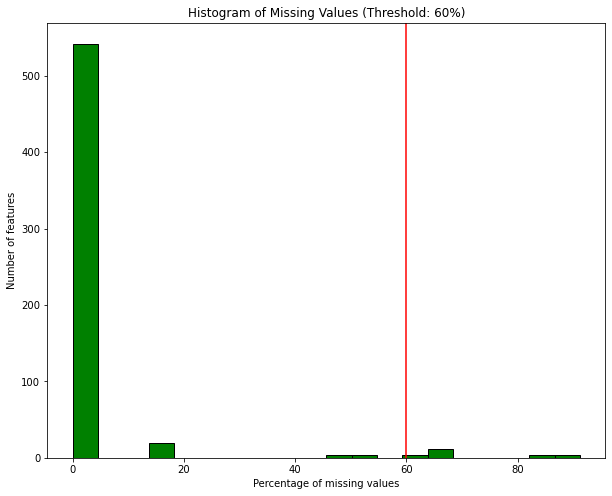

In [13]:
import matplotlib.pyplot as plt

# Plot a histogram of missing values
missing_threshold= 60
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(missing_percentages_columns, bins=20, color='green', edgecolor='black')
ax.set_xlabel('Percentage of missing values')
ax.set_ylabel('Number of features')
# Add a vertical line at the specified percentage threshold
ax.axvline(x=missing_threshold, color='red')
# Add a title to the plot
ax.set_title(f'Histogram of Missing Values (Threshold: {missing_threshold}%)')

# Show the plot
plt.show()


In [14]:
def count_features_above_threshold(dataframe, missing_threshold):

    # Count the number of features above the threshold
    num_features_above_threshold = (missing_percentages_columns > missing_threshold).sum()

    return num_features_above_threshold

# Call the function with your 'secom' dataframe and the threshold
num_features = count_features_above_threshold(secom, missing_threshold)

# Print the number of features above the threshold
print("Number of features with missing percentages above {}%: {}".format(missing_threshold, num_features))

Number of features with missing percentages above 60%: 24


In [15]:
def counts_as_percentage(series):
    return series.value_counts() / series.shape[0]
counts_as_percentage(secom['pass/fail'])

-1    0.933631
 1    0.066369
Name: pass/fail, dtype: float64

feature_1        5420.167484
feature_2        6465.399020
feature_3         871.026144
feature_4      195091.505178
feature_5        3175.946899
                   ...      
feature_587         0.000153
feature_588         0.000078
feature_589         0.000008
feature_590      8815.692532
pass/fail           0.248014
Length: 591, dtype: float64


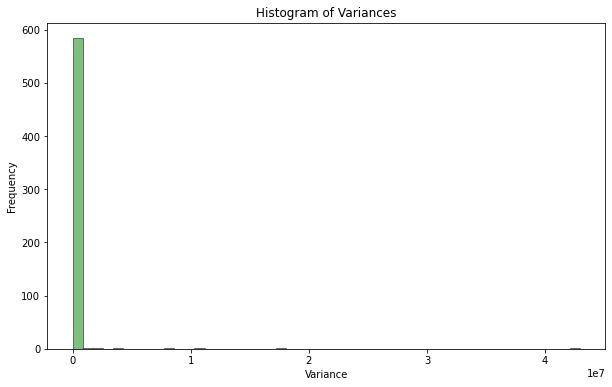

In [16]:
import matplotlib.pyplot as plt

def plot_variance_histogram(df):
    # Select only the numeric columns
    numeric_secom = df.select_dtypes(include='number')
    # Calculate the variance of every column
    variances = numeric_secom.var()
    print(variances)
    return variances

# Call the function with your dataframe
variances = plot_variance_histogram(secom)

# Plot the histogram of variances
variance_df = variances.to_frame(name='variance')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(variance_df, bins=50, alpha=0.5, color='Green', edgecolor='black')
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Variances')
plt.show()








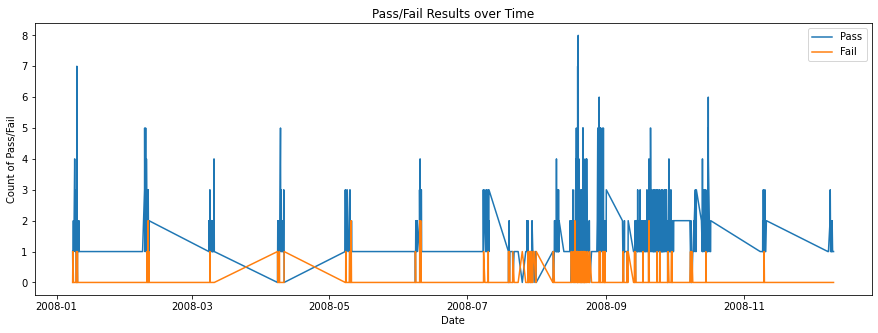

In [17]:
def plot_pass_fail_results_over_time(dataframe):
    # Convert the 'time' column to a datetime object
    dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'], dayfirst=True)
    
    # Create a new column 'Result' based on 'Pass/Fail' column
    dataframe['Result'] = dataframe['pass/fail'].apply(lambda x: 'Fail' if x == 1 else 'Pass')
    
    # Group the data by time and 'Result'
    dataframe = dataframe[['timestamp', 'Result']].copy()
    dataframe.set_index('timestamp', inplace=True)
    result_by_time = dataframe.groupby([pd.Grouper(freq='H'), 'Result'])['Result'].count().unstack()
    
    # Fill in any missing values with 0
    result_by_time = result_by_time.fillna(0)
    
    # Rename the columns to 'Pass' and 'Fail'
    result_by_time.columns = ['Fail', 'Pass']
    
    # Create a line chart showing the number of passes and fails over time
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(result_by_time.index, result_by_time['Pass'], label='Pass')
    ax.plot(result_by_time.index, result_by_time['Fail'], label='Fail')
    ax.set_xlabel('Date')
    ax.set_ylabel('Count of Pass/Fail')
    ax.set_title('Pass/Fail Results over Time')
    ax.legend()
    plt.show()

# Call the function with your dataframe
plot_pass_fail_results_over_time(secom)

In [18]:
import pandas as pd
import numpy as np
from scipy import stats

def count_outliers(secom, threshold=3):
    # Replace non-numeric values with NaN
    secom = secom.apply(pd.to_numeric, errors='coerce')

    # Create a copy of the DataFrame
    secom_copy = secom.copy()

    # Find the absolute z-scores of the data
    z_scores = np.abs(stats.zscore(secom_copy))

    # Count the number of outliers for each variable
    outlier_counts = pd.Series((z_scores > threshold).sum(axis=0), index=secom.columns)

    return outlier_counts

# Call the function with your 'secom' dataframe
outlier_counts = count_outliers(secom)

# Print the number of outliers in each column
print(outlier_counts) 

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
            ... 
pass/fail    104
timestamp      0
date           0
time           0
Result         0
Length: 595, dtype: int64


In [19]:
num_outliers = len(outlier_counts)
num_outliers

595

In [20]:
pass_fail = secom.pop('pass/fail')
secom.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,timestamp,date,time,Result
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0035,2.3630,NaN,NaN,NaN,NaN,2008-07-19 11:55:00,2008-07-19,11:55:00,Pass
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,2008-07-19 12:32:00,2008-07-19,12:32:00,Pass
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,2008-07-19 13:17:00,2008-07-19,13:17:00,Fail
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,2008-07-19 14:43:00,2008-07-19,14:43:00,Pass
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,2008-07-19 15:22:00,2008-07-19,15:22:00,Pass


In [21]:
secom.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,timestamp,date,time,Result
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0035,2.3630,NaN,NaN,NaN,NaN,2008-07-19 11:55:00,2008-07-19,11:55:00,Pass
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,2008-07-19 12:32:00,2008-07-19,12:32:00,Pass
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,2008-07-19 13:17:00,2008-07-19,13:17:00,Fail
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,2008-07-19 14:43:00,2008-07-19,14:43:00,Pass
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,2008-07-19 15:22:00,2008-07-19,15:22:00,Pass


In [22]:
import sklearn

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(secom, pass_fail, stratify=pass_fail, test_size=0.2, random_state=777)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 1397 to 996
Columns: 594 entries, feature_1 to Result
dtypes: datetime64[ns](1), float64(590), object(3)
memory usage: 5.7+ MB


In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 87 to 433
Columns: 594 entries, feature_1 to Result
dtypes: datetime64[ns](1), float64(590), object(3)
memory usage: 1.4+ MB


In [27]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 314 entries, 87 to 433
Series name: pass/fail
Non-Null Count  Dtype
--------------  -----
314 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


In [28]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1253 entries, 1397 to 996
Series name: pass/fail
Non-Null Count  Dtype
--------------  -----
1253 non-null   int64
dtypes: int64(1)
memory usage: 19.6 KB


In [29]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,timestamp,date,time,Result
1397,2984.41,2550.88,2192.1889,1435.9611,2.3870,100.0,107.3989,0.1229,1.5613,0.0005,...,0.0034,2.5174,0.0106,0.0075,0.0025,71.0842,2008-07-10 11:16:00,2008-07-10,11:16:00,Pass
854,2993.19,2577.23,2204.2333,2110.8288,1.6392,100.0,89.0356,0.1245,1.4788,0.0124,...,0.0027,2.6034,0.0281,0.0227,0.0059,80.5639,2008-09-15 22:13:00,2008-09-15,22:13:00,Pass
1256,2914.04,2487.10,2238.1444,1580.6951,1.0062,100.0,91.0489,0.1230,1.4778,0.0095,...,0.0039,2.8615,0.0223,0.0152,0.0043,68.2176,2008-02-10 22:23:00,2008-02-10,22:23:00,Pass
1367,2886.03,2499.46,2231.0555,1303.5386,0.9751,100.0,95.7878,0.1198,1.4685,0.0057,...,0.0020,1.1975,0.0331,0.0469,0.0151,141.6245,2008-06-10 15:52:00,2008-06-10,15:52:00,Pass
1486,2984.93,2432.38,2177.4333,2945.8855,1.3321,100.0,83.1700,0.1253,1.3471,-0.0089,...,0.0035,2.3612,0.0191,0.0123,0.0040,64.6789,2008-10-13 19:40:00,2008-10-13,19:40:00,Pass


In [30]:
X_train_missing= X_train.isna().sum()
X_train_missing

feature_1       6
feature_2       7
feature_3      10
feature_4      10
feature_5      10
               ..
feature_590     0
timestamp       0
date            0
time            0
Result          0
Length: 594, dtype: int64

In [32]:
X_train_missing_percentages= X_train.isna().mean()*100
X_train_missing_percentages

feature_1      0.478851
feature_2      0.558659
feature_3      0.798085
feature_4      0.798085
feature_5      0.798085
                 ...   
feature_590    0.000000
timestamp      0.000000
date           0.000000
time           0.000000
Result         0.000000
Length: 594, dtype: float64

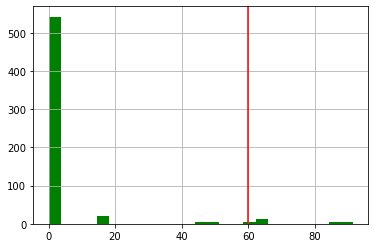

In [33]:
import matplotlib.pyplot as plt
missing_threshold= 60
X_train_missing_percentages.hist(bins=25, color = 'green')
plt.axvline(x=missing_threshold, color='red')
plt.xlabel= ('percentages of missing')
plt.ylabel= ('number of features')
plt.title = (' histogram of missing_percentages in X_train')
plt.show() 


In [34]:
import pandas as pd

def drop_features_above_threshold(dataframe, missing_threshold):
    missing_threshold=60

    # Find the features that have missing values above the threshold
    features_above_threshold = X_train_missing_percentages[X_train_missing_percentages > missing_threshold].index

    # Drop the features from the DataFrame
    dataframe_dropped = dataframe.drop(features_above_threshold, axis=1)

    return dataframe_dropped

X_train = drop_features_above_threshold(X_train, missing_threshold)

In [35]:
import pandas as pd
def Find_features_with_missing(X_train_missing_percentages, top_n=5):
    top_missing = X_train_missing_percentages.sort_values(ascending=False).head(top_n)
    return top_missing

# Call the function with your DataFrame
top_missing_features = Find_features_with_missing(X_train_missing_percentages, top_n=5)

# Print the top features with missing values
print(top_missing_features)

feature_294    91.460495
feature_293    91.460495
feature_159    91.460495
feature_158    91.460495
feature_493    85.075818
dtype: float64


TypeError: 'str' object is not callable

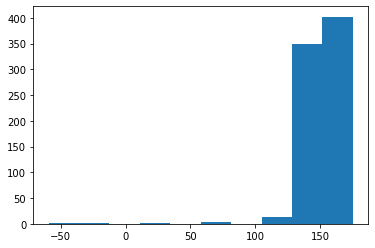

In [36]:
   
import pandas as pd
import matplotlib.pyplot as plt

dataset = secom

# Assuming the five features you want to plot are 'feature1', 'feature2', 'feature3', 'feature4', and 'feature5'
features = X_train[['feature_73', 'feature_74', 'feature_347', 'feature_346', 'feature_520']]
# Iterate over the features and plot histograms
for feature in features:
    plt.hist(dataset[feature], bins=10)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


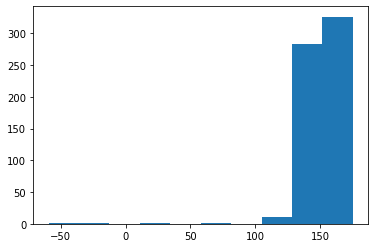

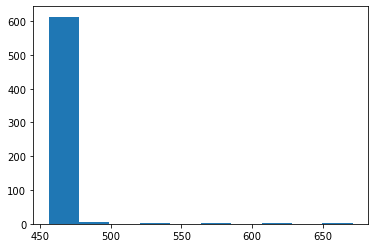

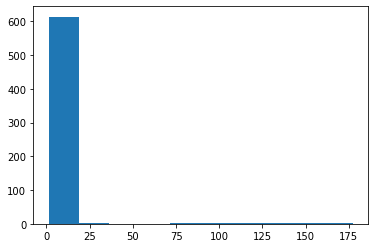

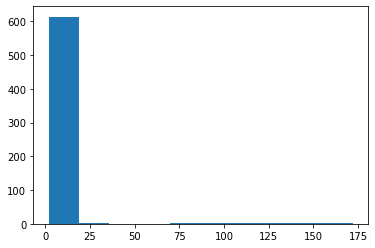

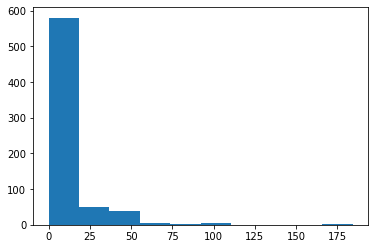

In [37]:
import matplotlib.pyplot as plt
# Plot histogram
# Select the columns corresponding to top missing features 
features = X_train[['feature_73', 'feature_74', 'feature_347', 'feature_346', 'feature_520']]

# Plot each feature separately
for column in features.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(features[column])
    plt.show()

In [38]:
import pandas as pd
import numpy as np
from scipy import stats

def count_outliers(X_train, threshold=3):
    # Select only numeric columns from X_train
    X_train_numeric = X_train.select_dtypes(include=[np.number])

    # Find the absolute z-scores of the numeric data
    z_scores = np.abs(stats.zscore(X_train_numeric))

    # Count the number of outliers for each variable
    outlier_counts = (z_scores > threshold).sum(axis=0)

    # Filter out columns with no outliers
    outlier_counts = outlier_counts[outlier_counts > 0]

    return outlier_counts

# Call the function with your 'X_train' DataFrame
outlier_counts = count_outliers(X_train)

# Print the number of outliers in each column
print(outlier_counts)
sum_outliers = outlier_counts.sum()
print(sum_outliers)

feature_21      8
feature_84      2
feature_87     14
feature_88      6
feature_89      5
feature_114     6
feature_115     8
feature_116    12
feature_117     6
feature_118     1
feature_120     3
feature_121    18
feature_157     7
feature_219     8
feature_222     6
feature_223     6
feature_224     8
feature_249     4
feature_250     7
feature_251     5
feature_252     4
feature_253     1
feature_255     4
feature_256     3
feature_292     6
feature_357    11
feature_360     8
feature_361     5
feature_362     8
feature_387     4
feature_388     7
feature_389     6
feature_390     4
feature_391     1
feature_393     4
feature_394     2
feature_430     6
feature_491    13
feature_494     6
feature_495     6
feature_496    11
feature_521     4
feature_522    17
feature_523     6
feature_524     4
feature_525     1
feature_527     4
feature_528     2
feature_571    14
feature_572    27
feature_573    48
feature_574    46
feature_575    53
feature_576    43
feature_577    54
feature_57

In [39]:
import pandas as pd
import numpy as np
from scipy import stats

def count_outliers(X_train, threshold=3):
    # Select only numeric columns from X_train
    X_train_numeric = X_train.select_dtypes(include=[np.number])

    # Find the absolute z-scores of the numeric data
    z_scores = np.abs(stats.zscore(X_train_numeric))

    # Replace outliers with NaN
    X_train_numeric[z_scores > threshold] = np.nan

    # Count the number of outliers for each variable
    outlier_counts = X_train_numeric.isnull().sum()
    return outlier_counts

# Call the function with your 'X_train' DataFrame
outlier_counts = count_outliers(X_train)

# Print the number of outliers in each column
print(outlier_counts)

# Calculate the total number of outliers
sum_outliers = outlier_counts.sum()
print(sum_outliers)

feature_1       6
feature_2       7
feature_3      10
feature_4      10
feature_5      10
               ..
feature_586     1
feature_587    10
feature_588    18
feature_589    18
feature_590    33
Length: 566, dtype: int64
12164


In [40]:
import pandas as pd
import numpy as np
from scipy import stats

def count_outliers(X_train, threshold=3):
    # Select only numeric columns from X_train
    X_train_numeric = X_train.select_dtypes(include=[np.number])

    # Find the absolute z-scores of the numeric data
    z_scores = np.abs(stats.zscore(X_train_numeric))

    # Count the number of outliers for each variable
    outlier_counts = (z_scores > threshold).sum(axis=0)

    # Filter out columns with no outliers
    outlier_counts = outlier_counts[outlier_counts > 0]

    return outlier_counts

# Call the function with your 'X_train' DataFrame
outlier_counts = count_outliers(X_train)

# Print the number of outliers in each column
print(outlier_counts)

# Calculate the total number of outliers
sum_outliers = outlier_counts.sum()
print(sum_outliers)

Series([], dtype: int64)
0


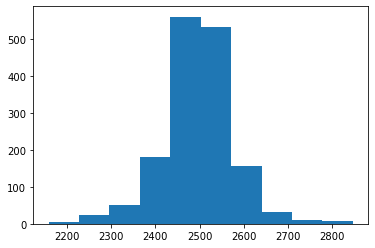

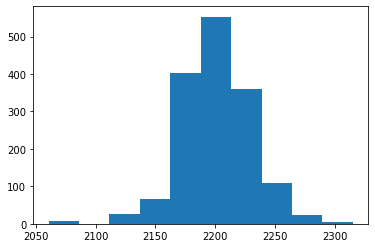

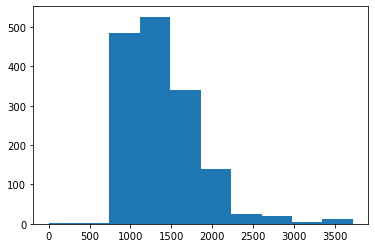

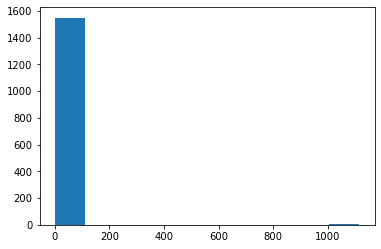

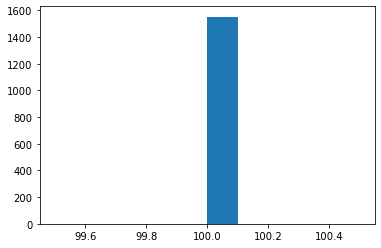

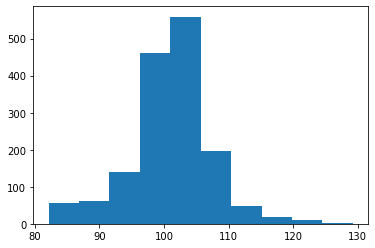

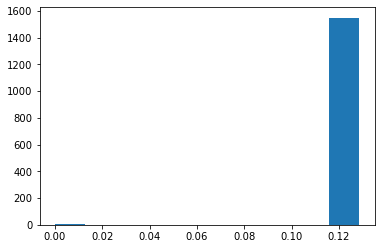

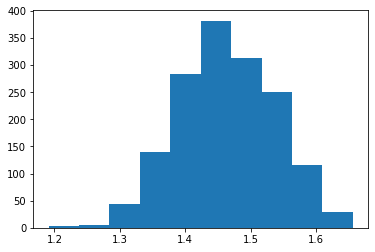

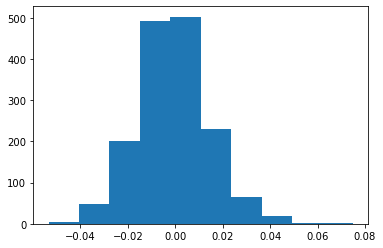

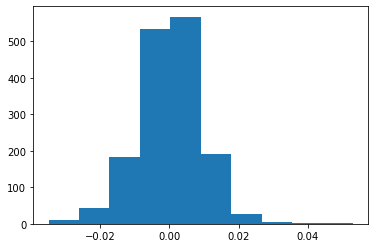

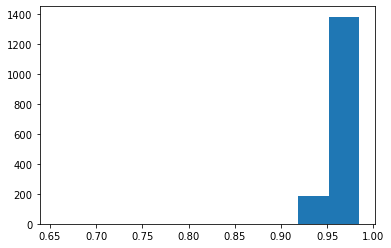

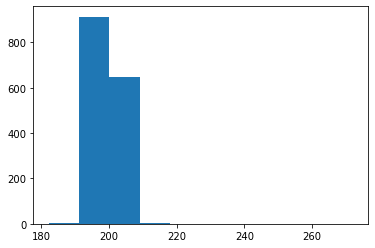

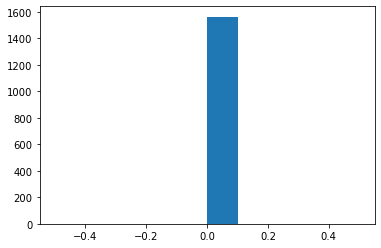

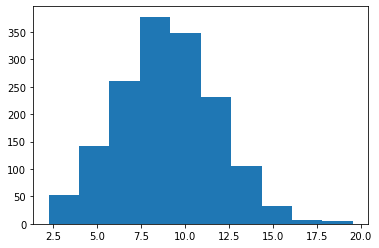

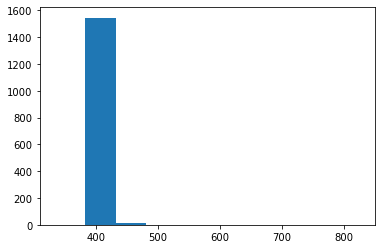

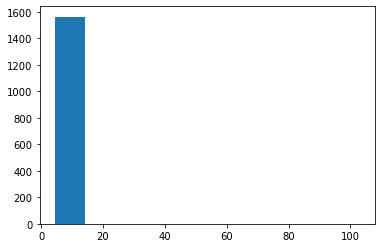

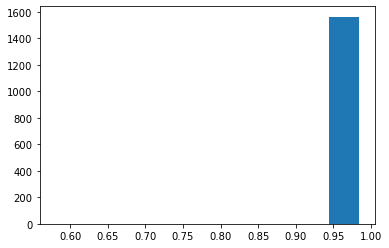

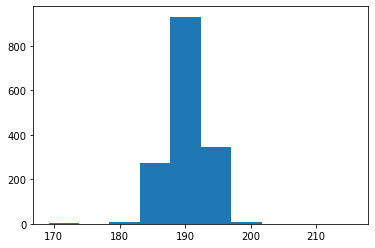

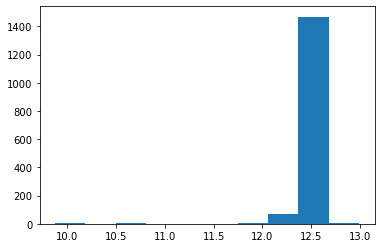

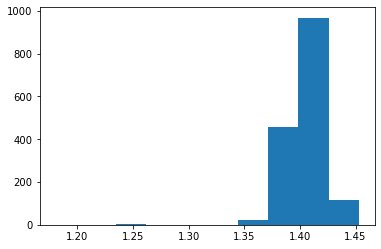

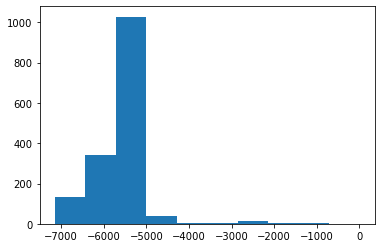

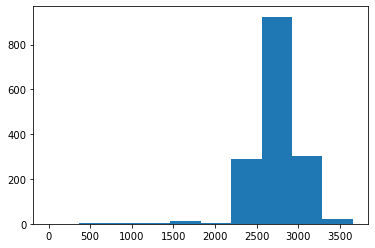

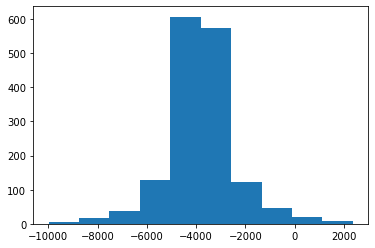

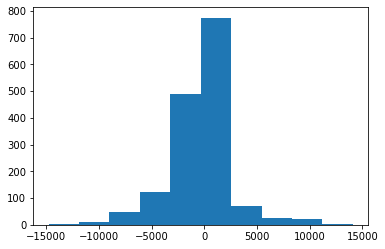

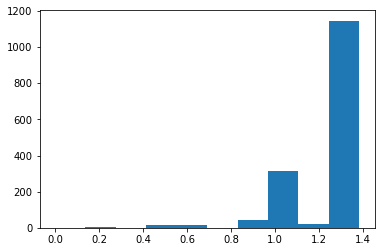

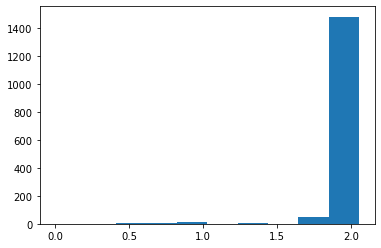

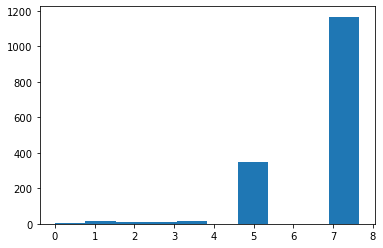

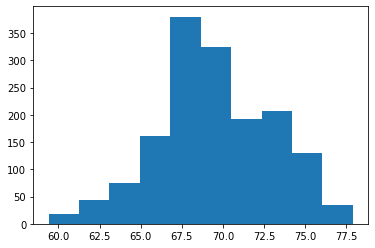

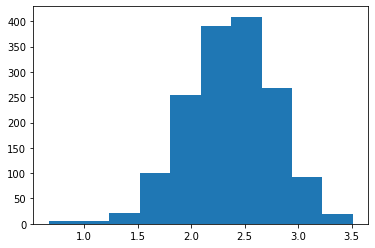

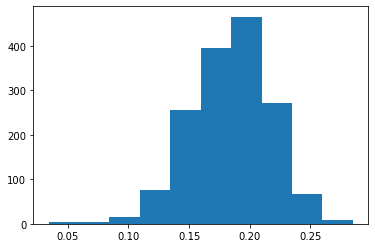

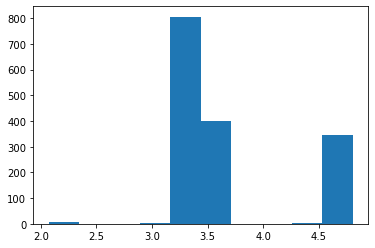

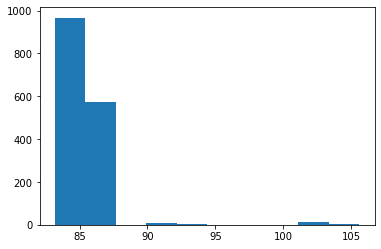

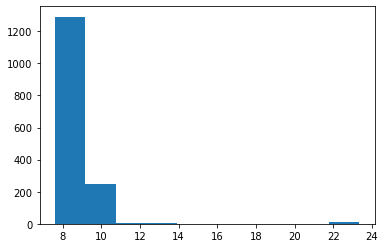

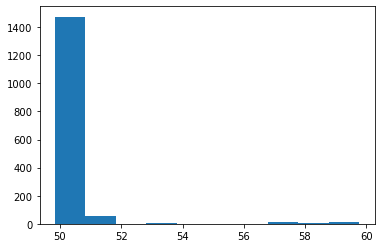

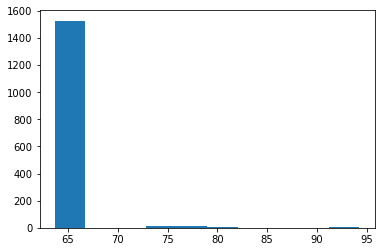

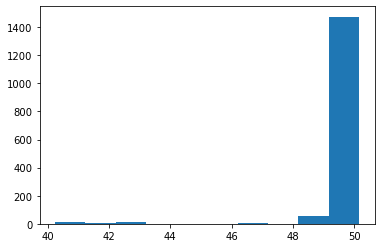

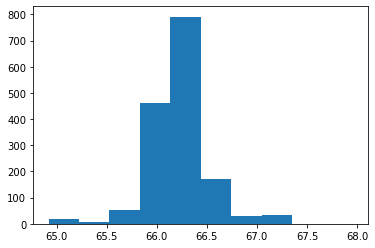

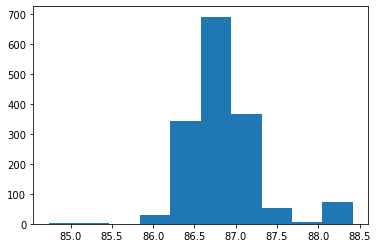

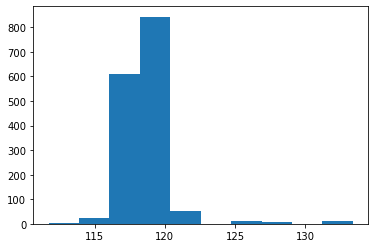

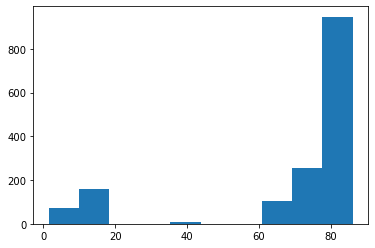

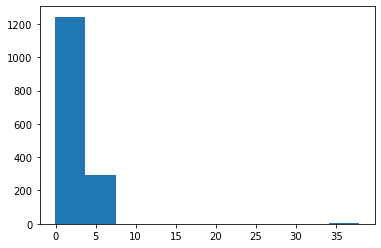

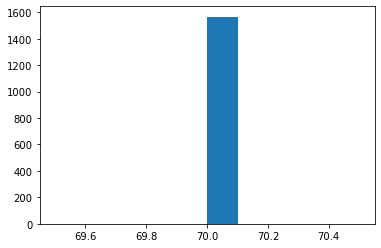

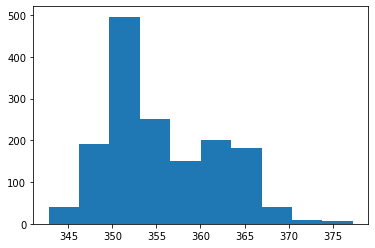

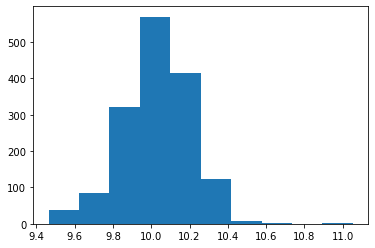

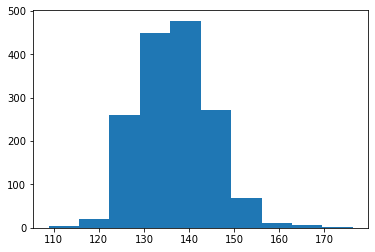

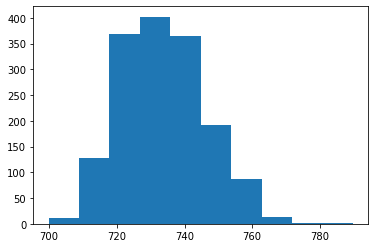

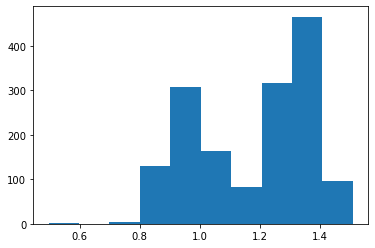

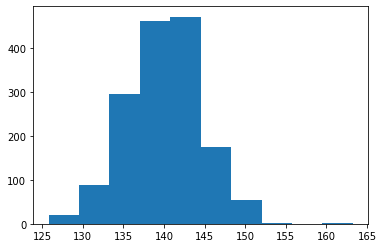

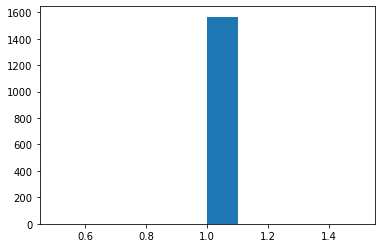

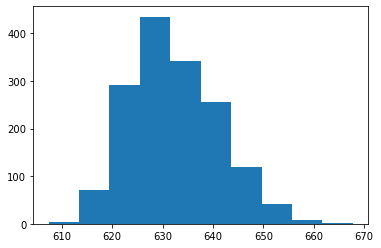

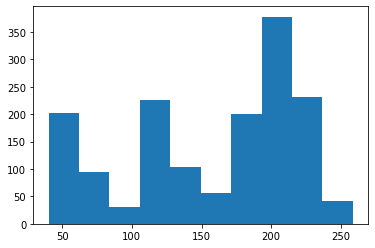

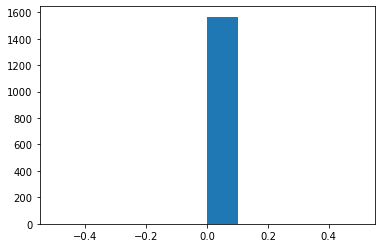

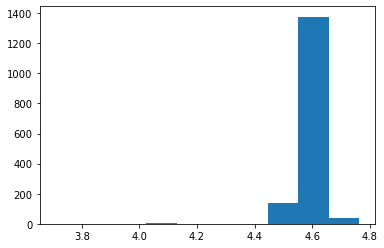

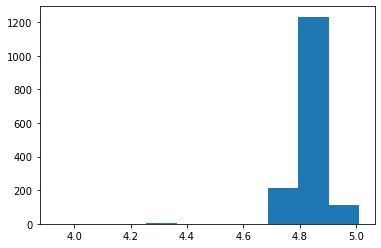

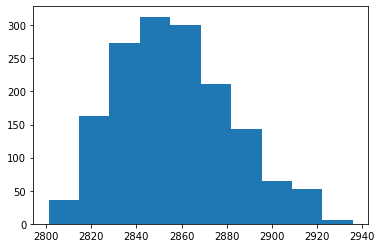

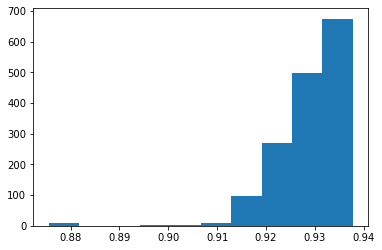

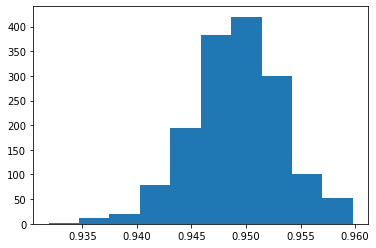

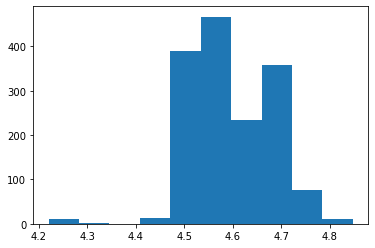

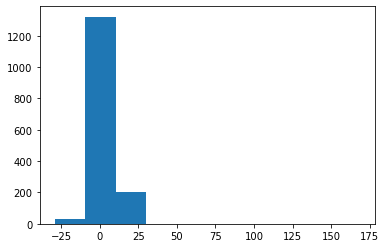

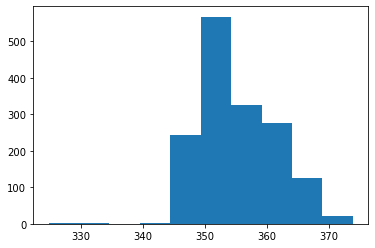

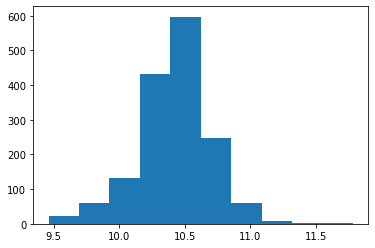

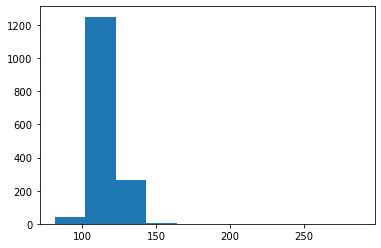

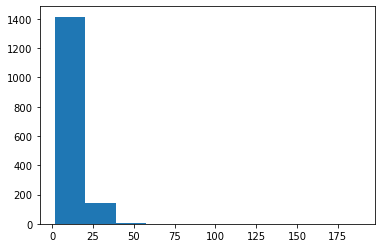

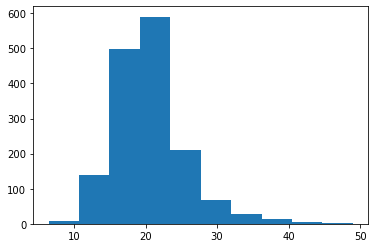

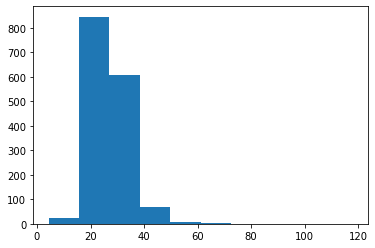

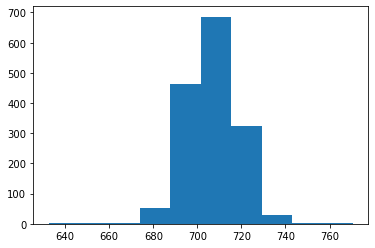

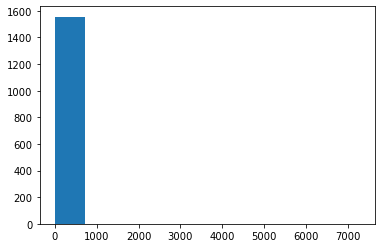

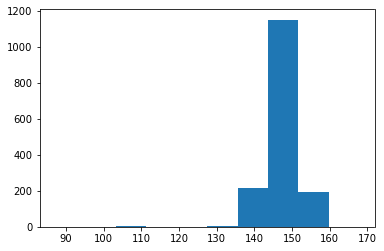

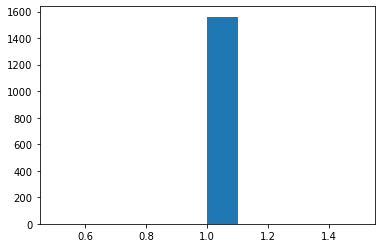

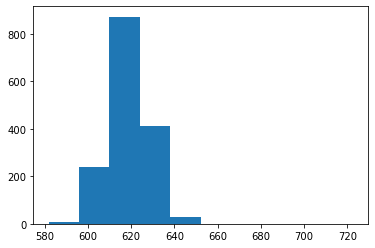

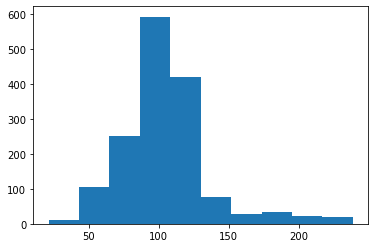

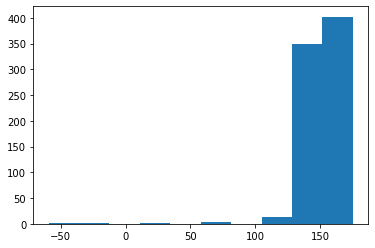

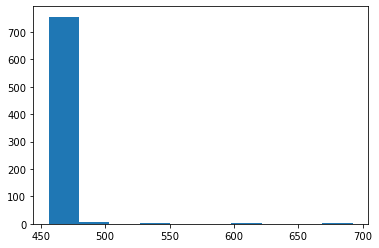

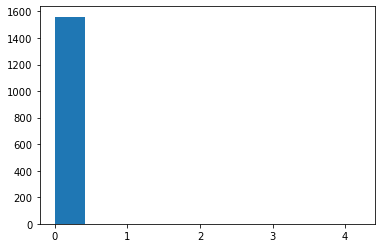

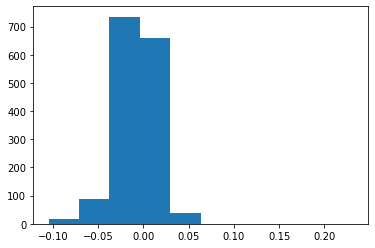

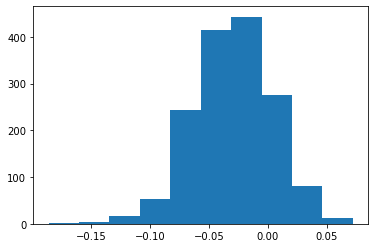

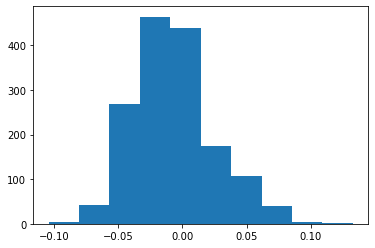

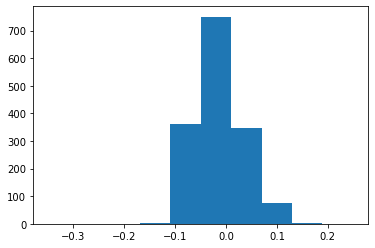

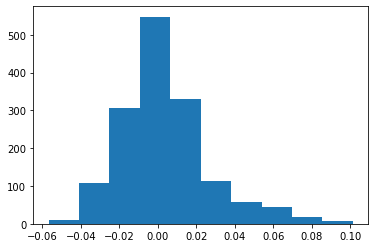

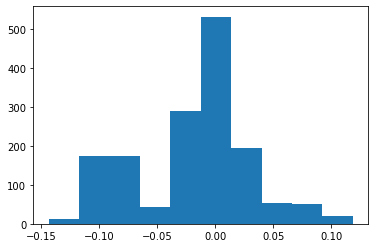

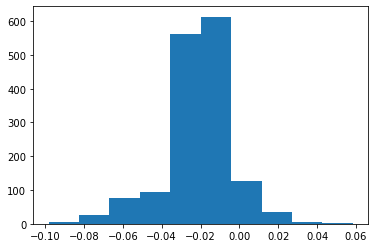

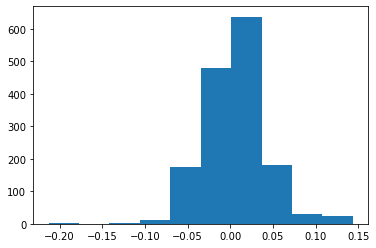

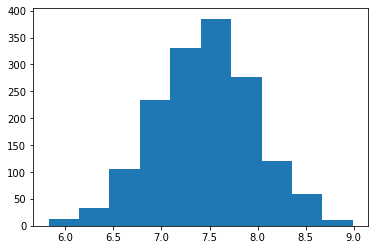

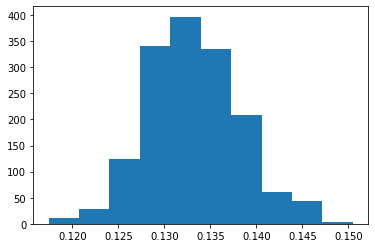

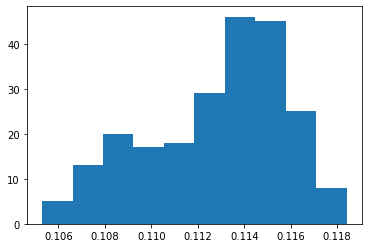

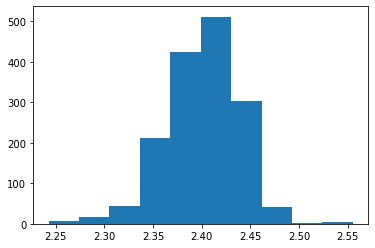

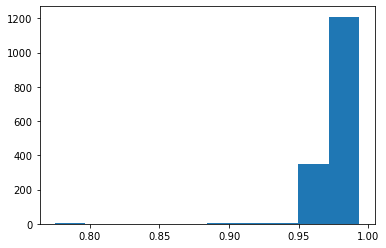

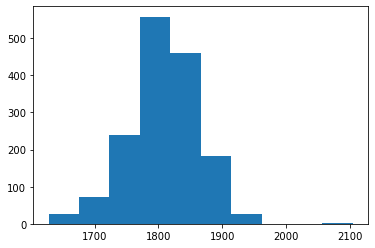

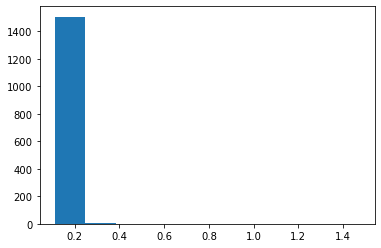

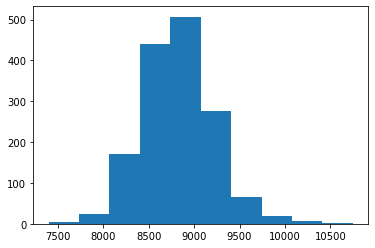

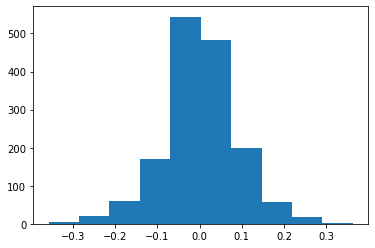

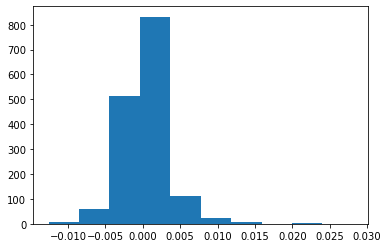

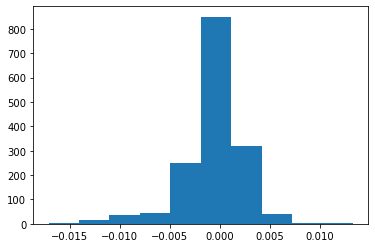

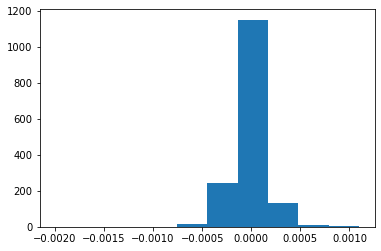

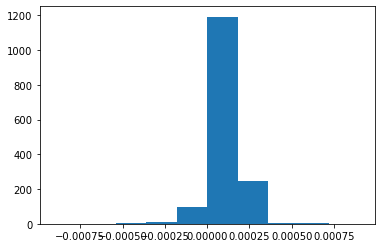

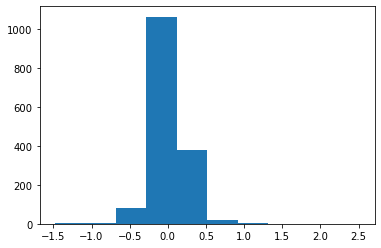

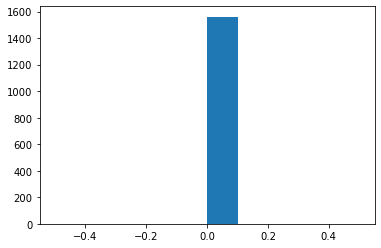

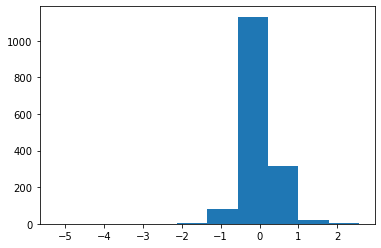

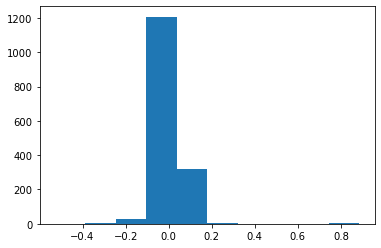

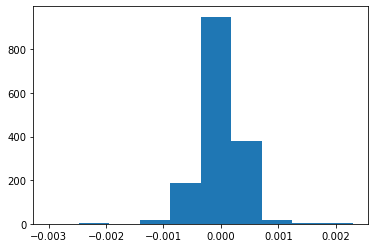

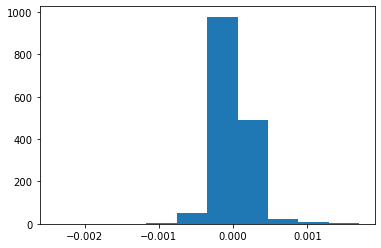

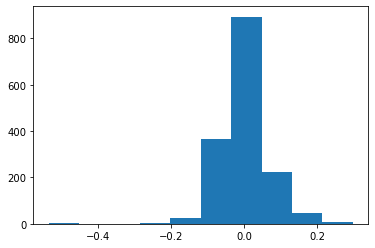

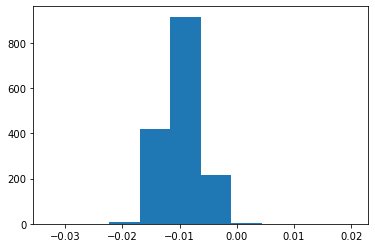

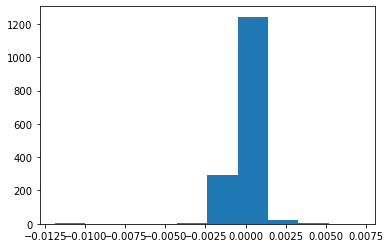

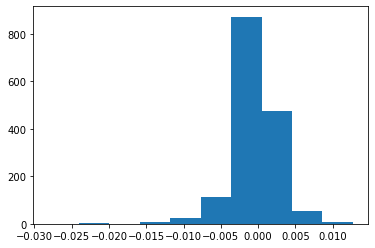

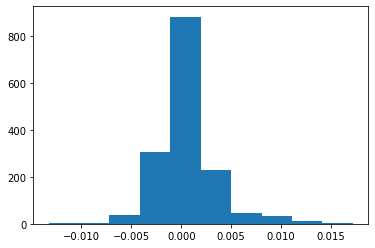

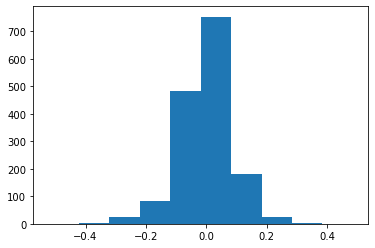

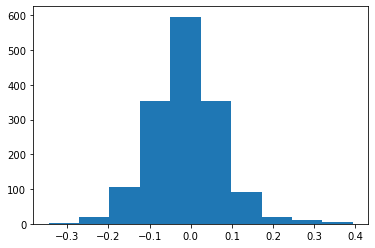

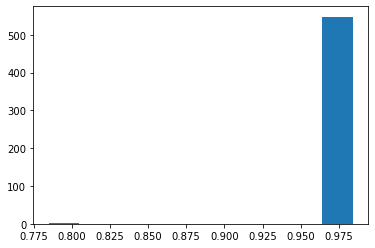

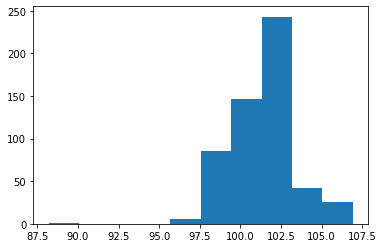

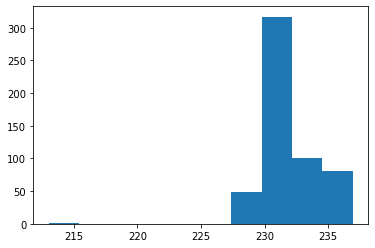

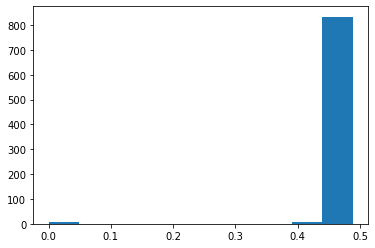

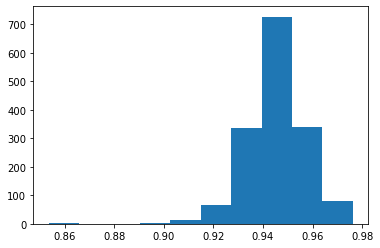

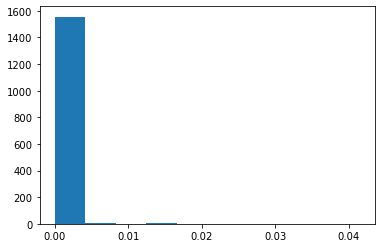

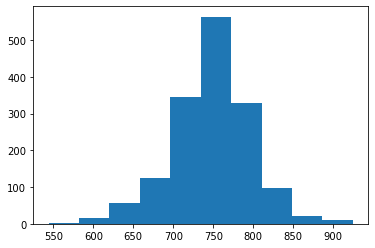

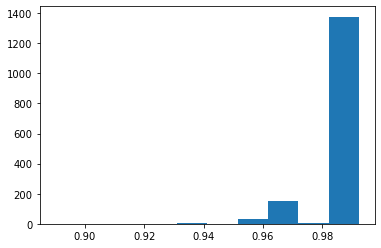

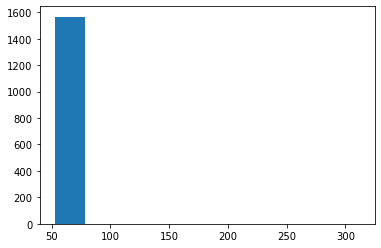

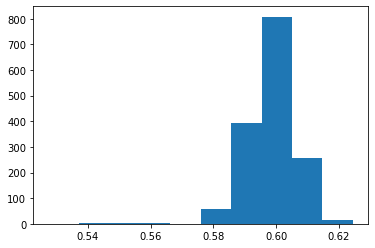

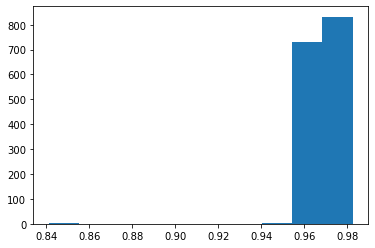

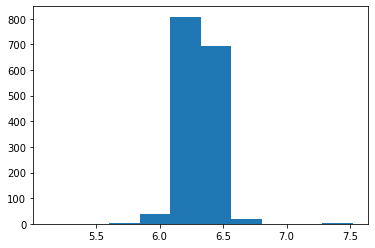

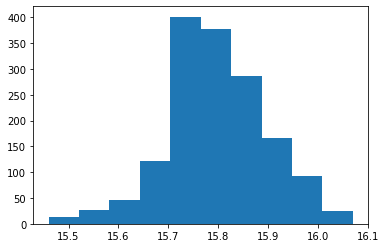

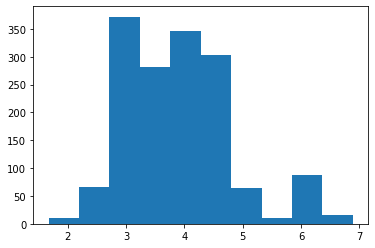

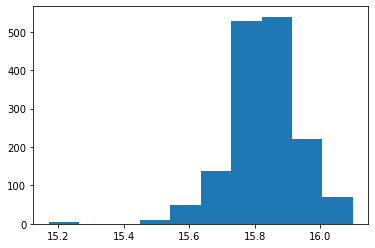

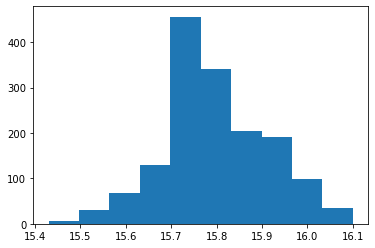

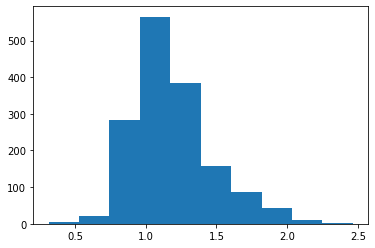

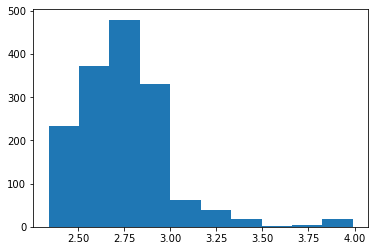

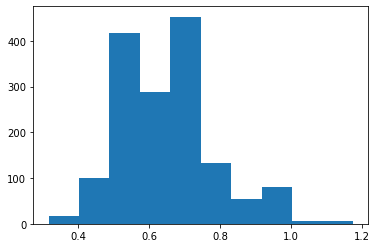

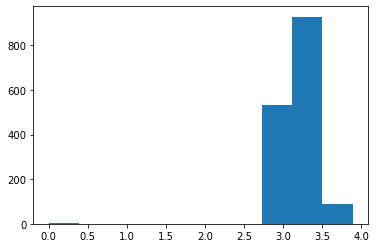

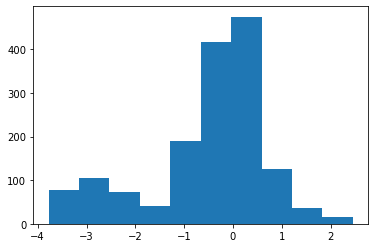

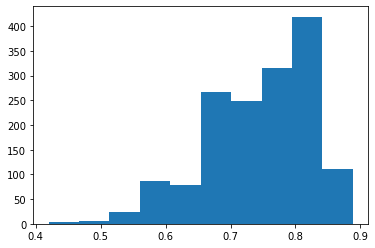

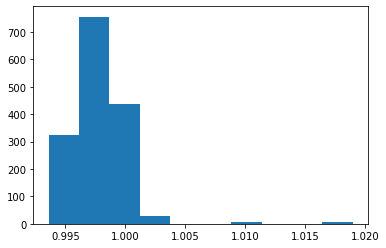

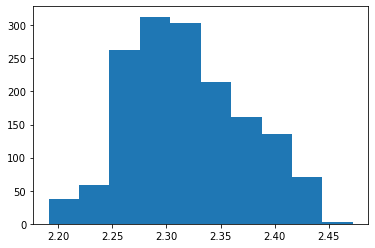

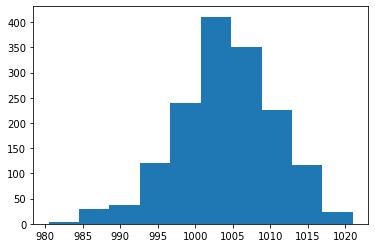

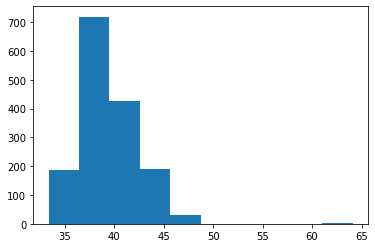

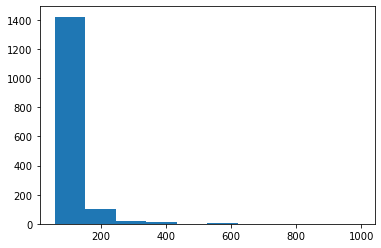

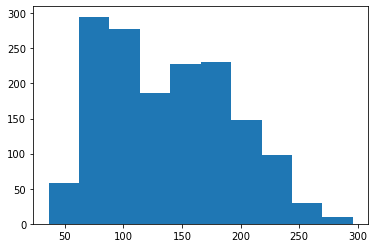

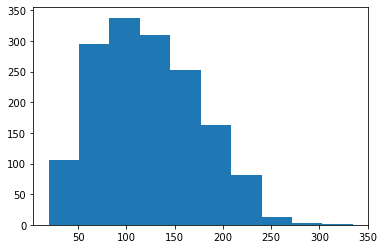

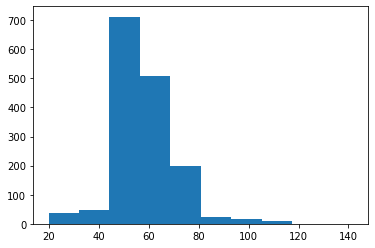

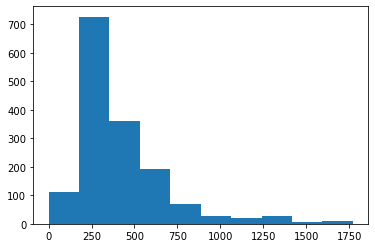

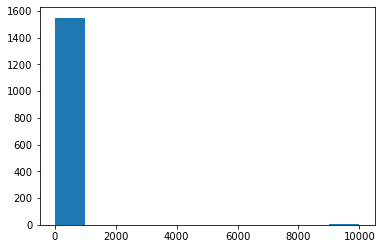

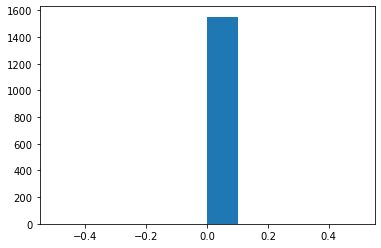

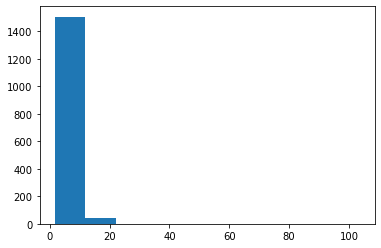

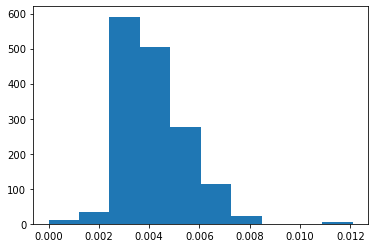

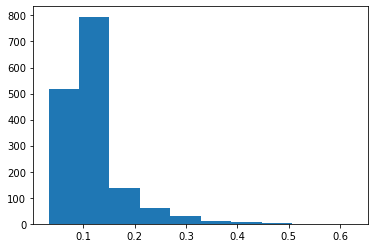

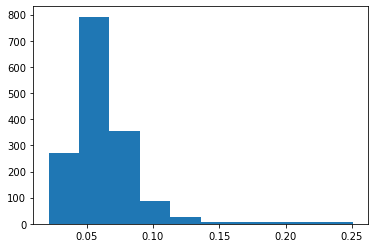

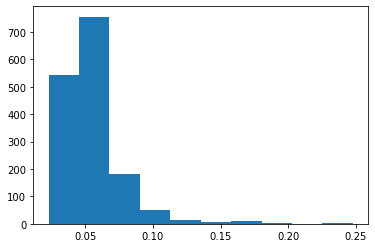

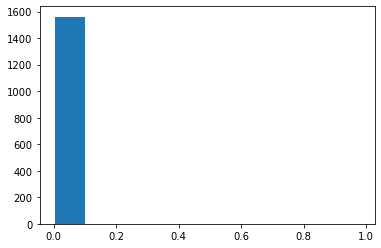

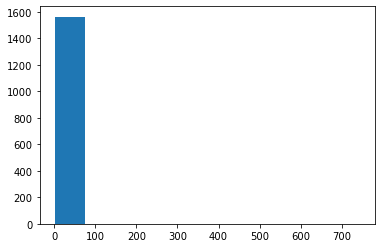

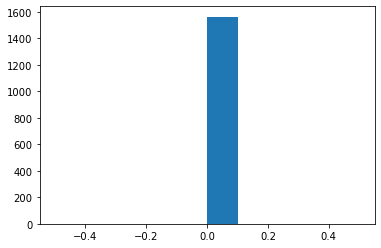

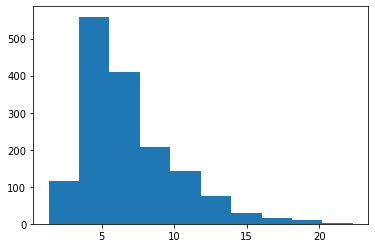

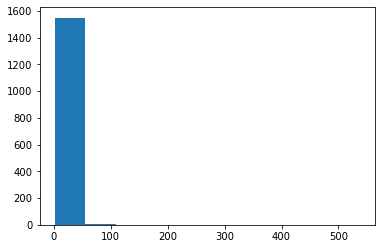

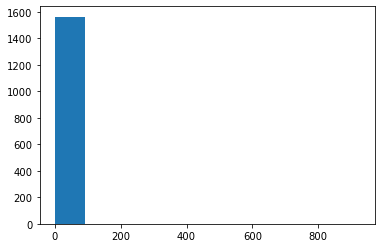

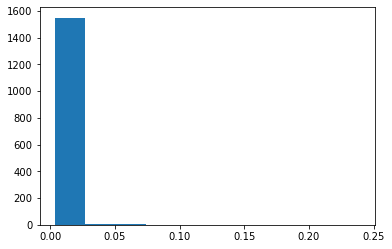

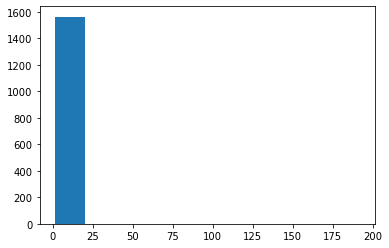

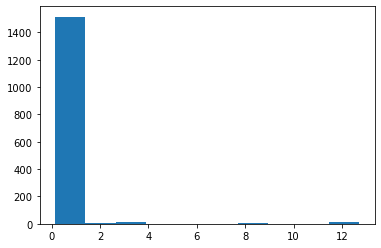

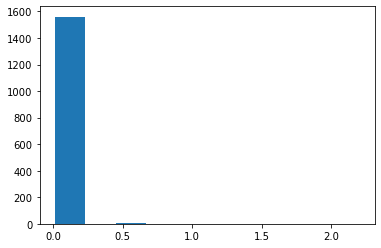

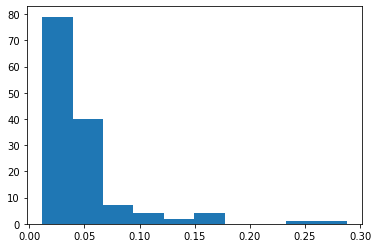

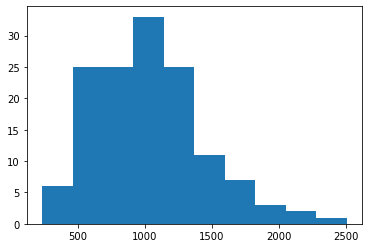

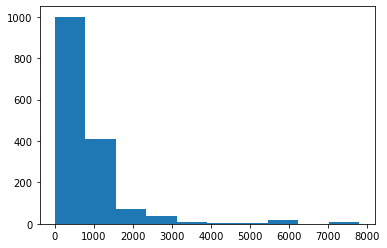

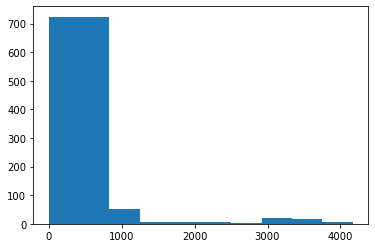

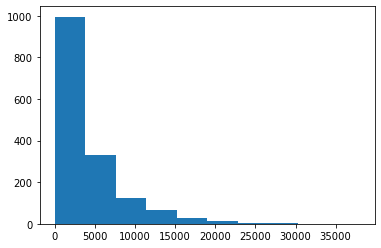

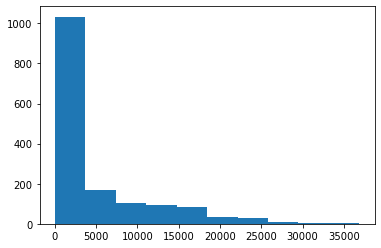

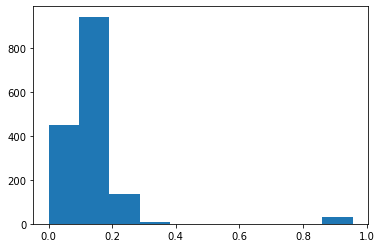

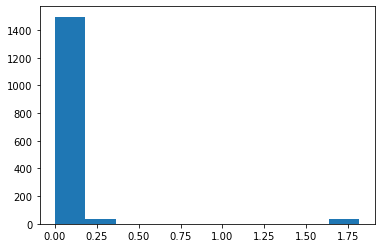

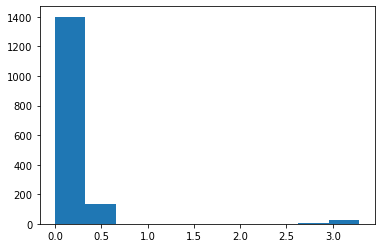

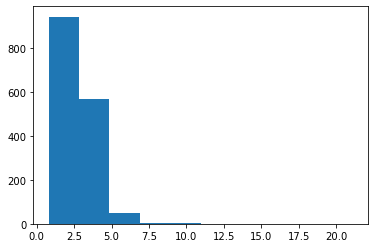

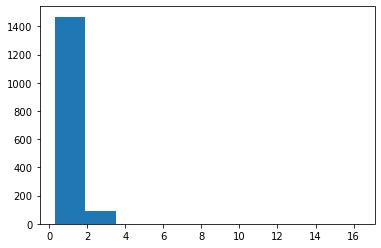

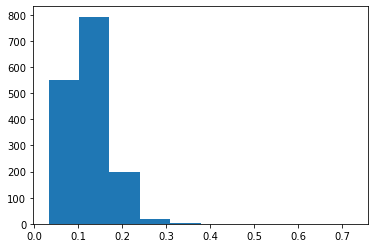

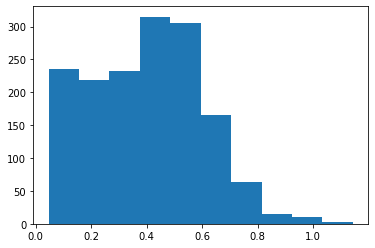

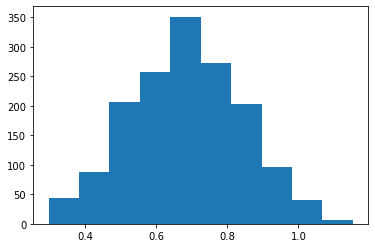

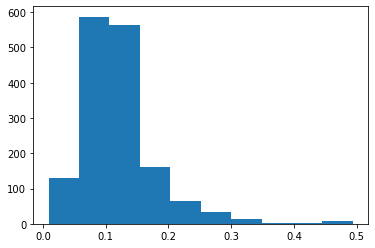

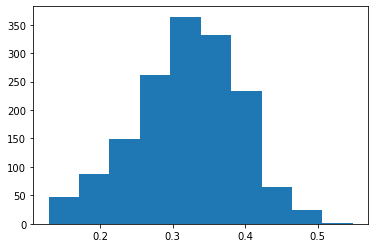

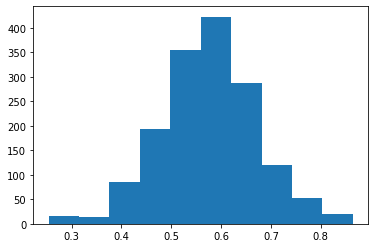

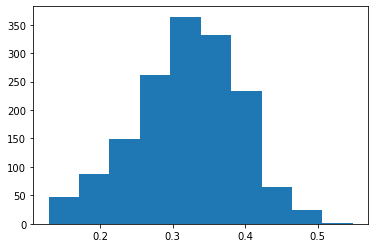

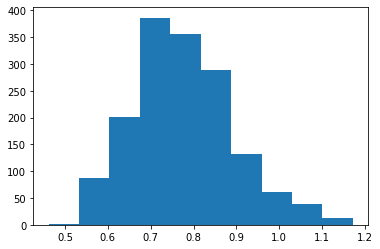

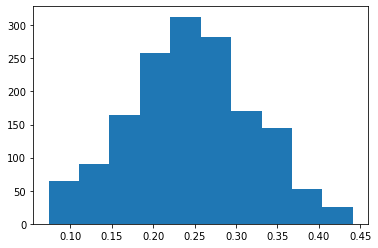

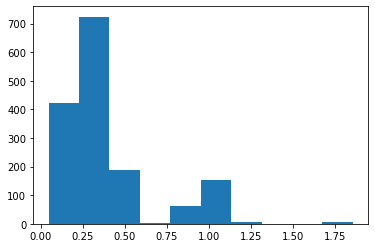

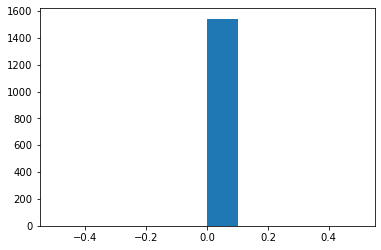

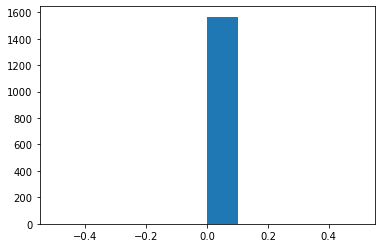

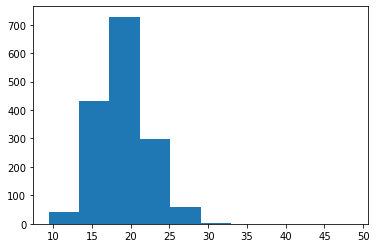

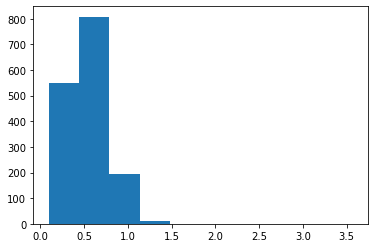

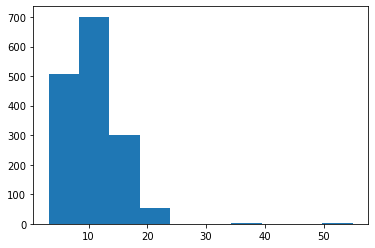

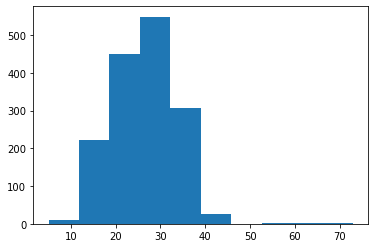

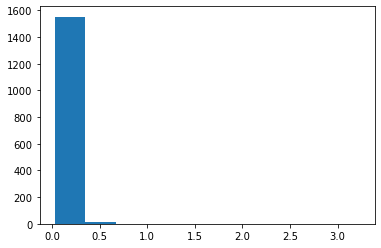

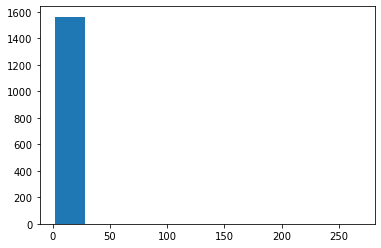

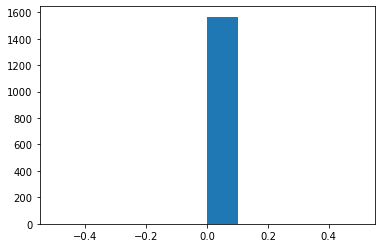

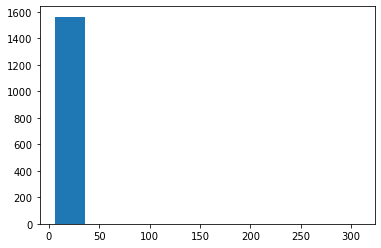

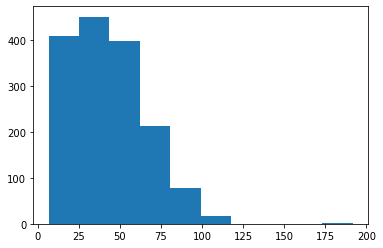

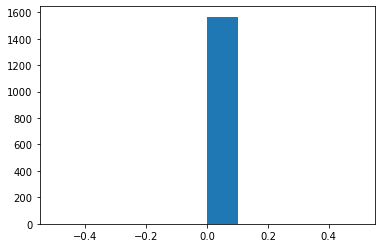

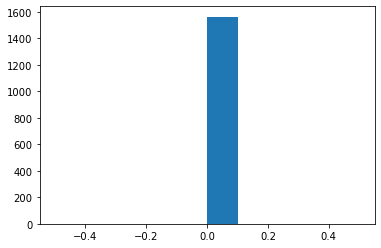

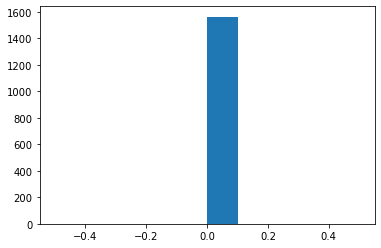

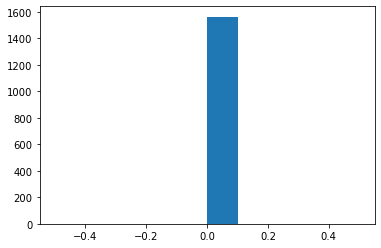

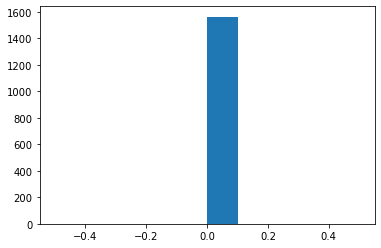

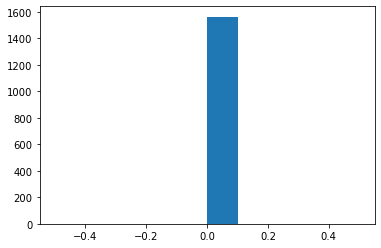

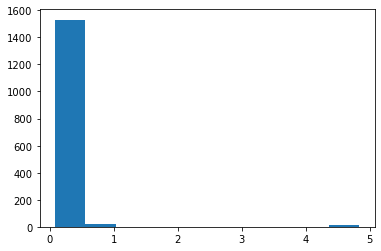

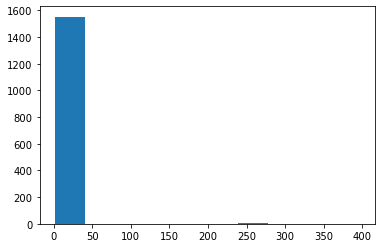

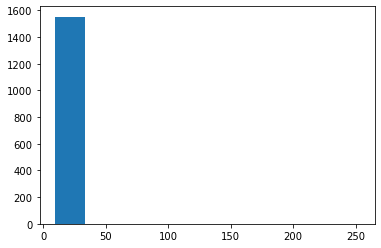

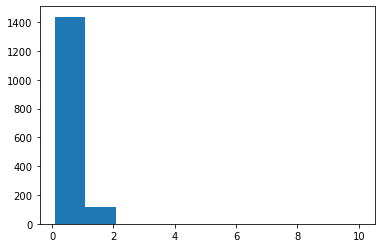

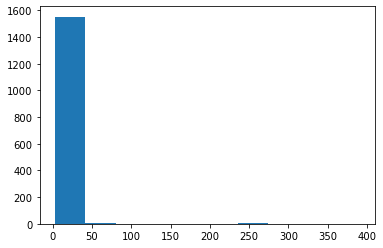

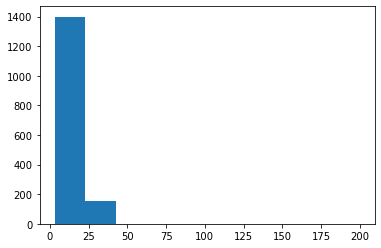

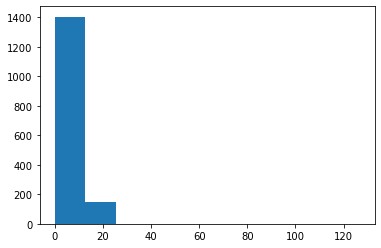

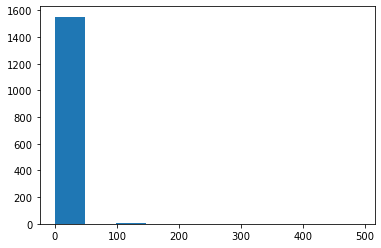

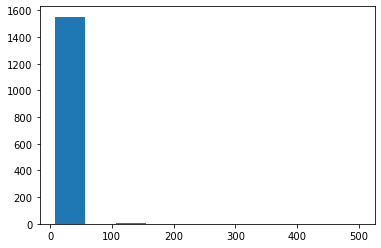

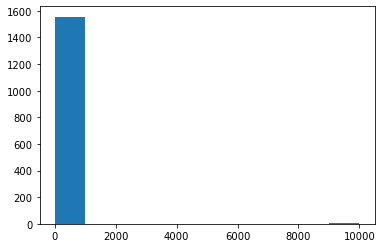

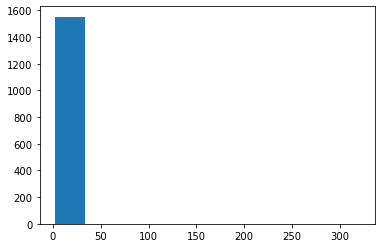

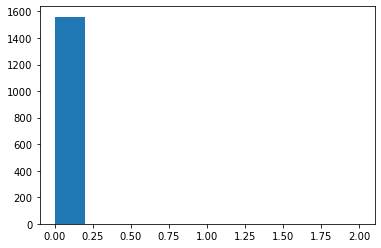

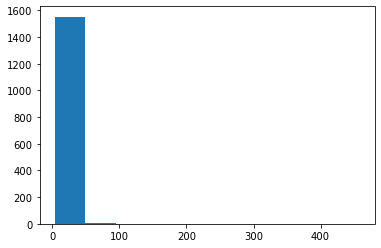

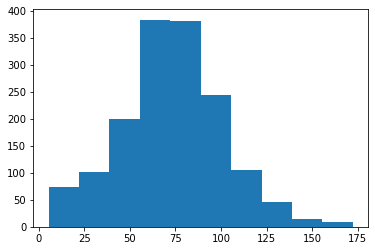

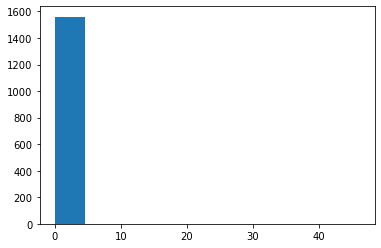

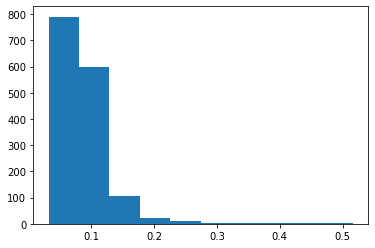

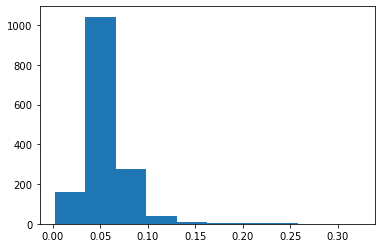

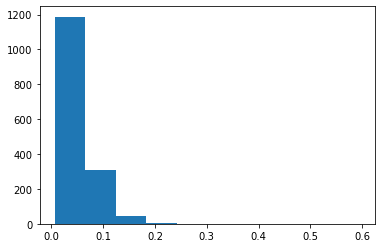

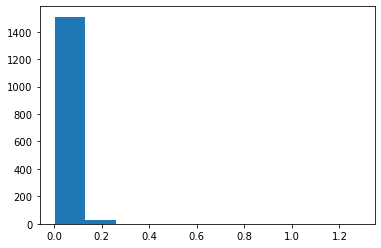

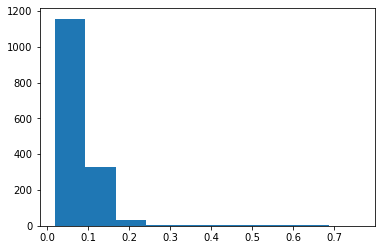

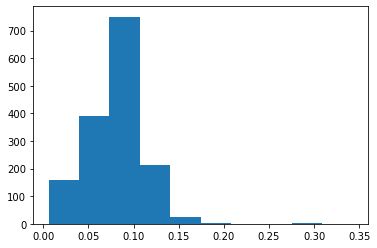

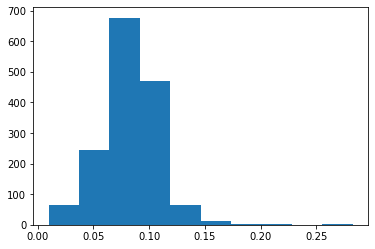

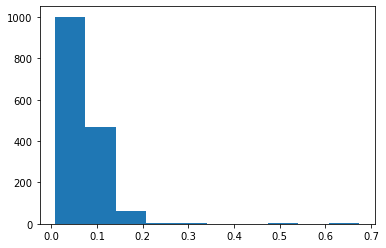

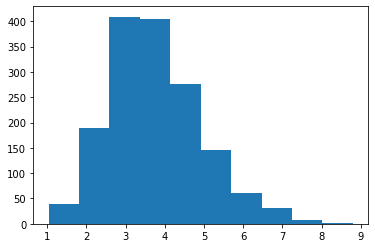

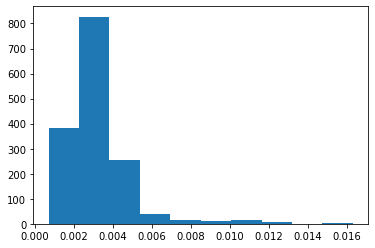

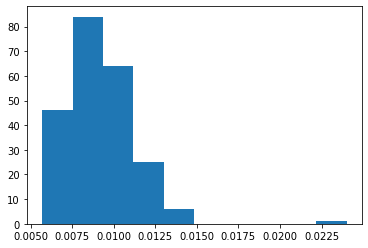

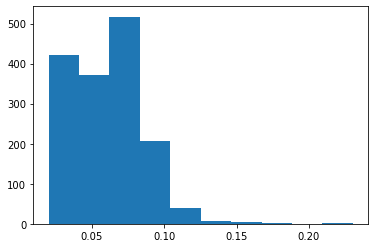

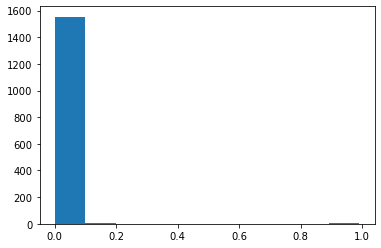

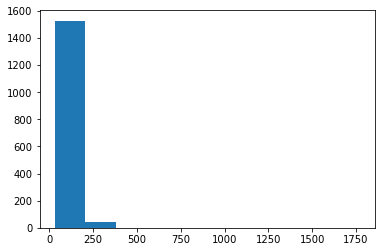

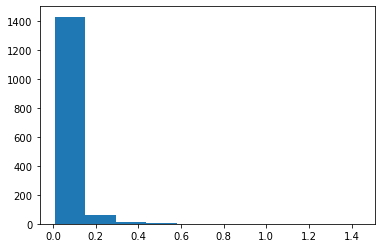

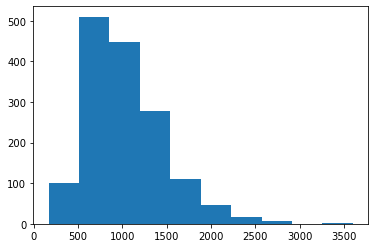

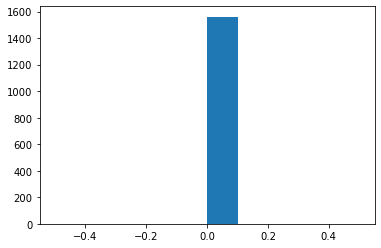

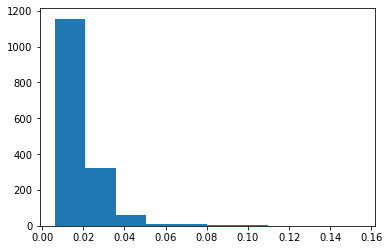

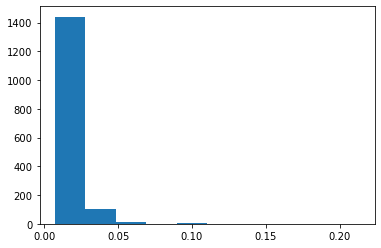

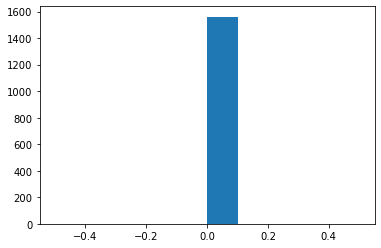

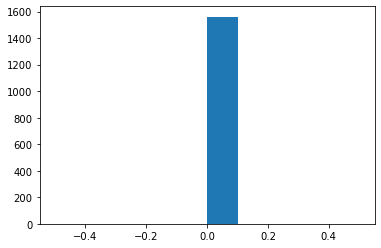

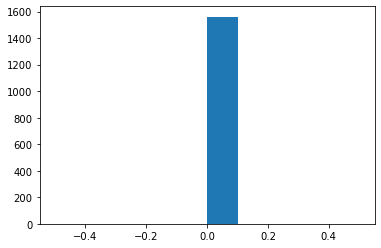

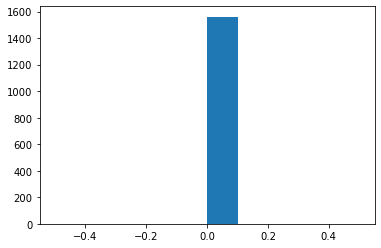

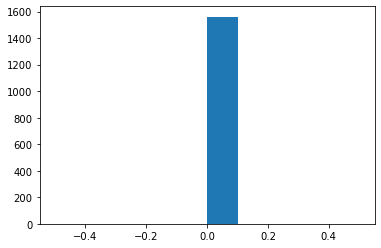

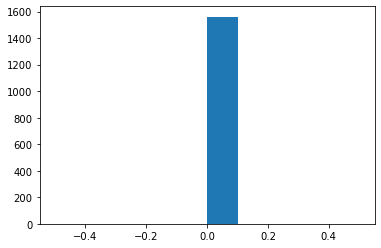

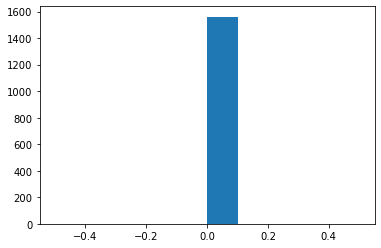

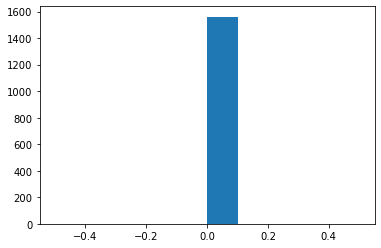

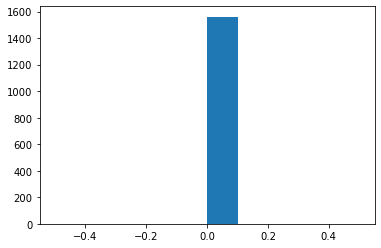

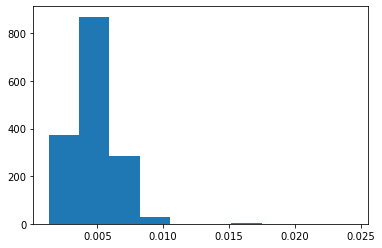

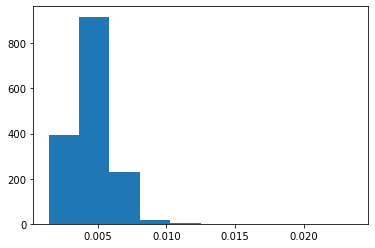

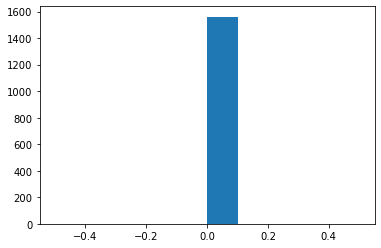

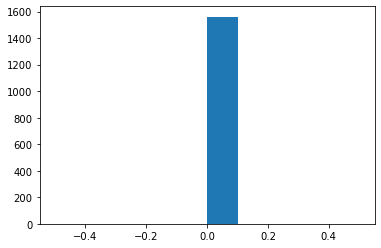

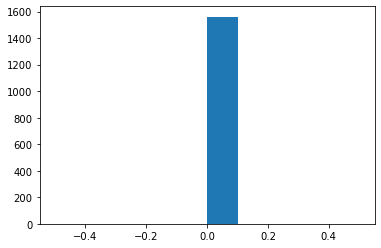

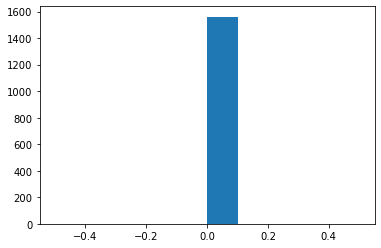

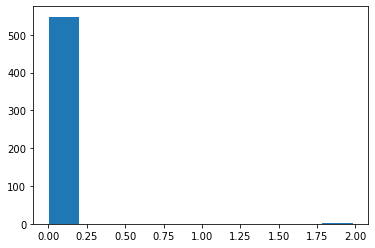

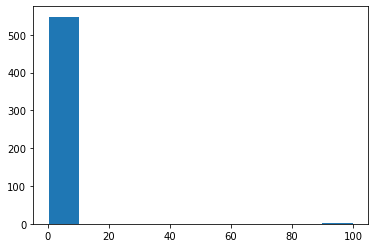

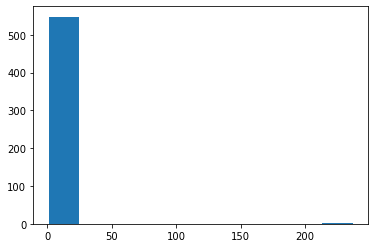

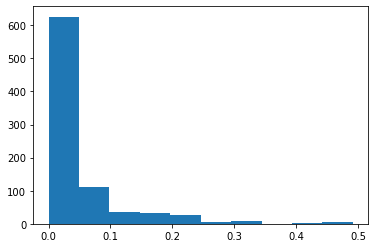

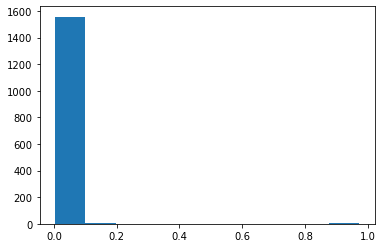

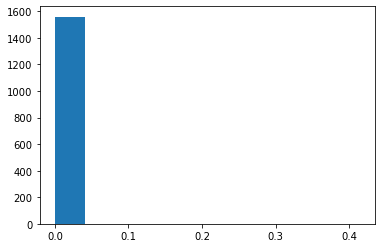

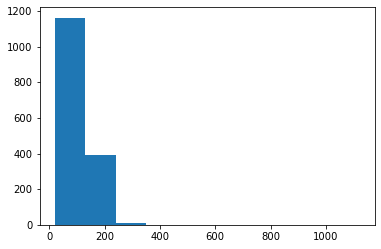

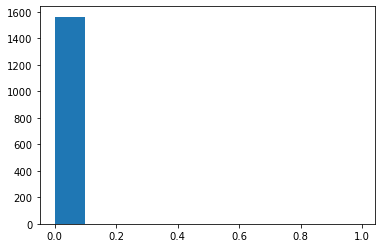

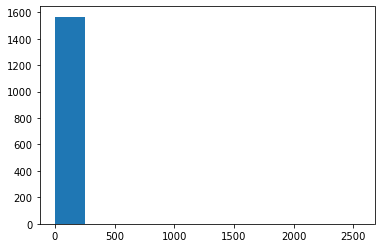

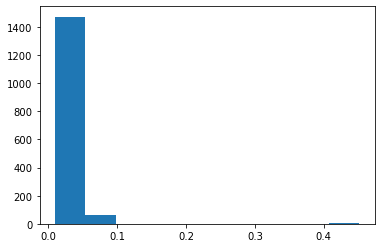

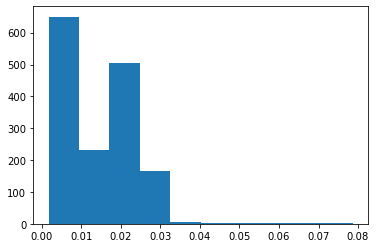

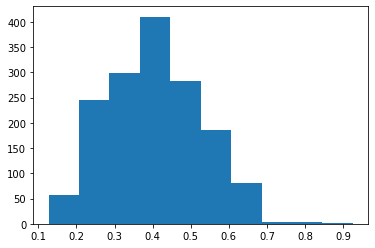

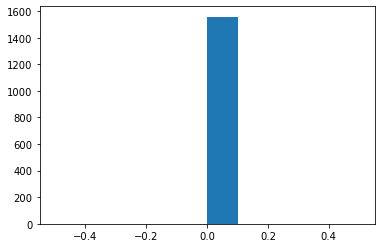

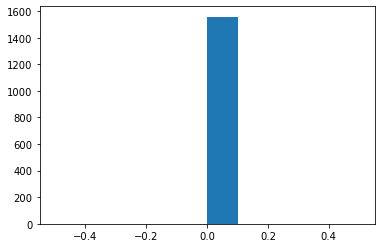

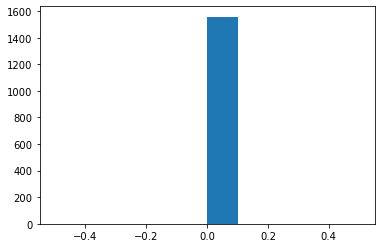

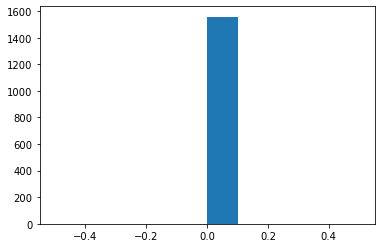

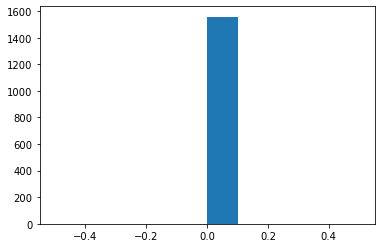

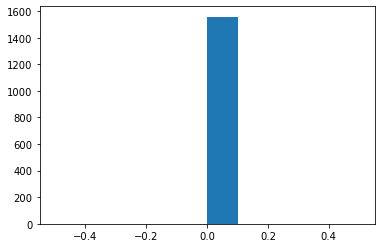

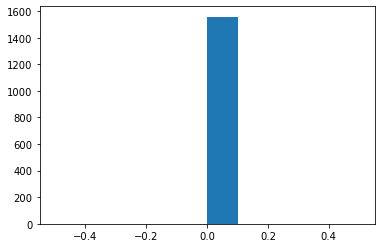

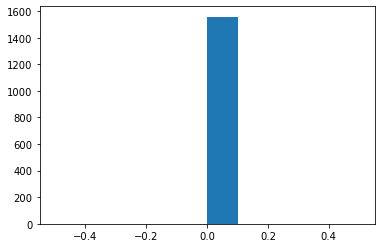

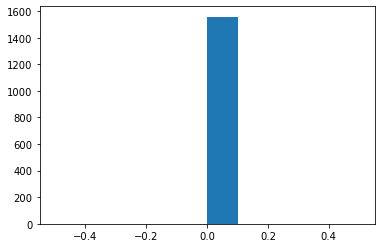

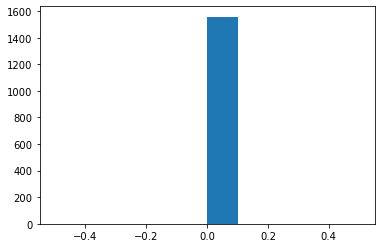

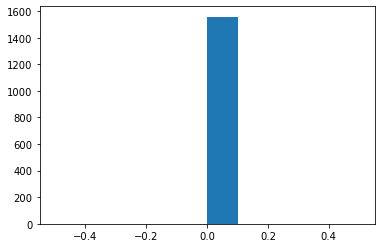

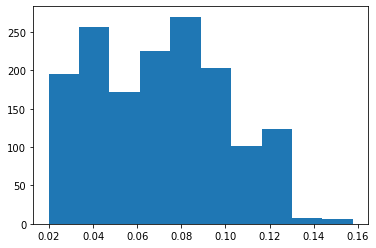

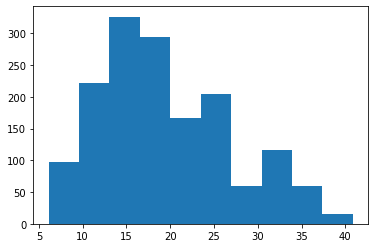

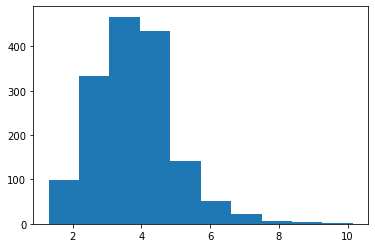

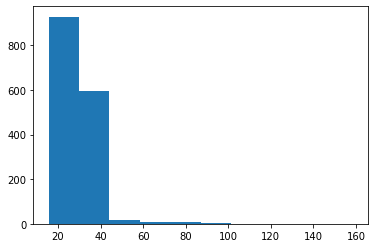

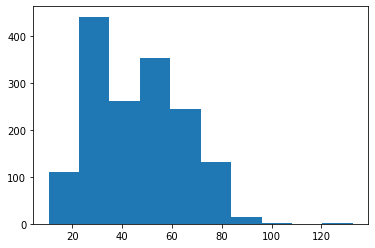

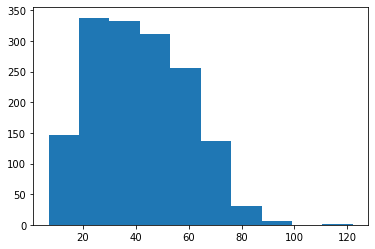

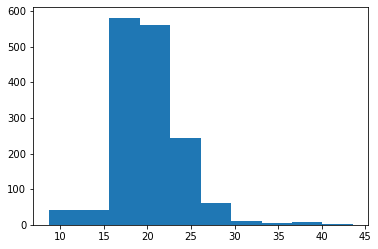

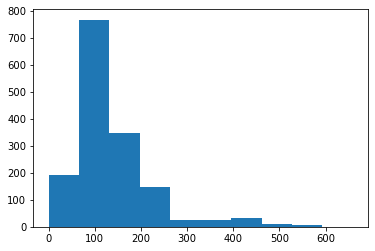

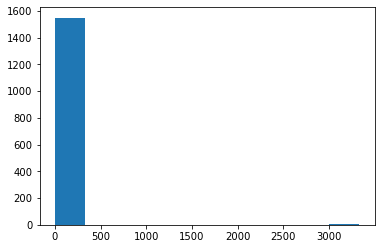

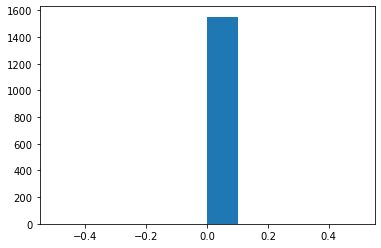

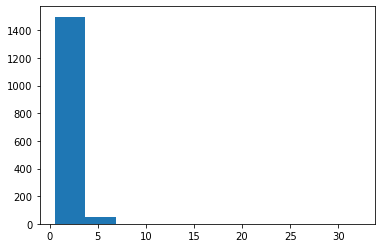

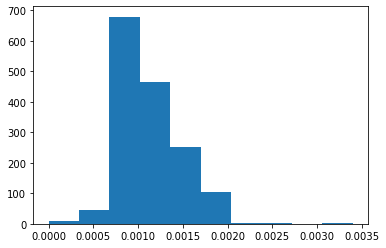

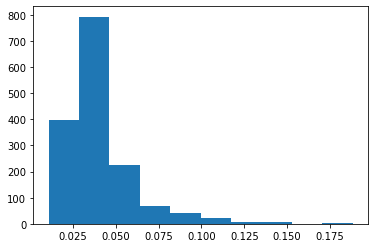

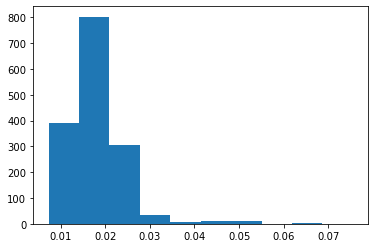

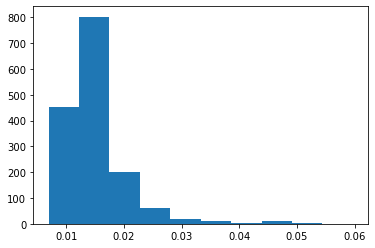

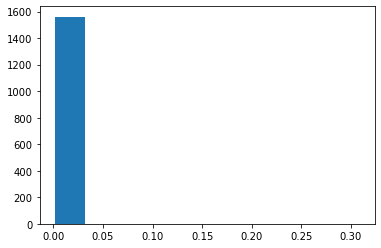

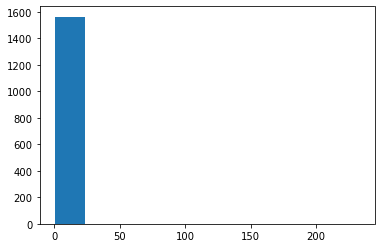

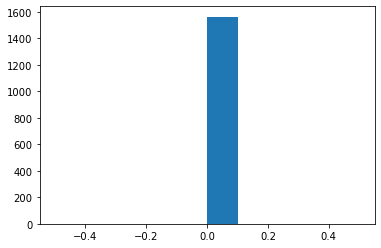

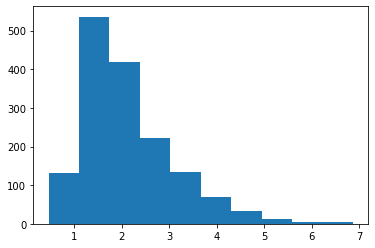

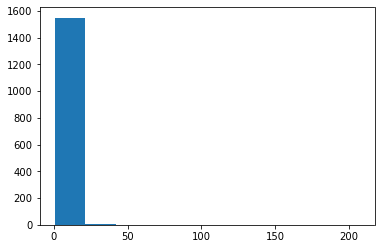

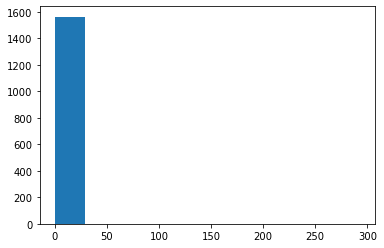

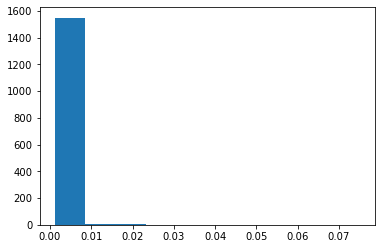

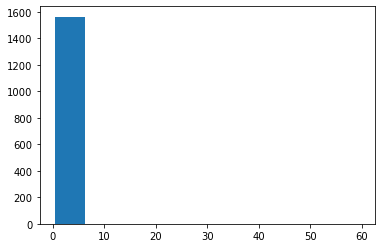

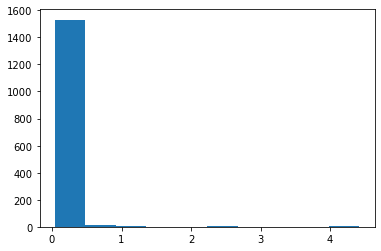

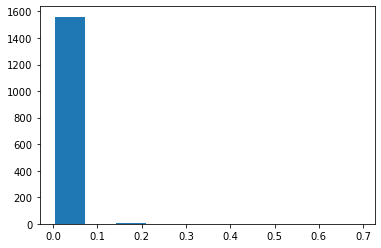

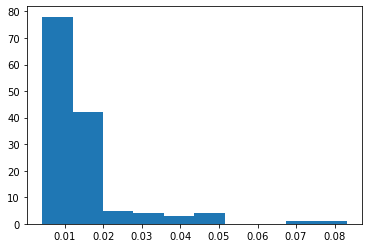

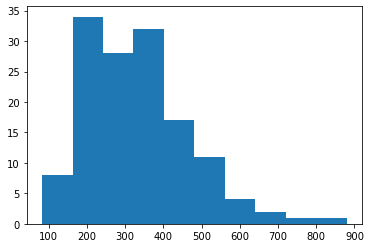

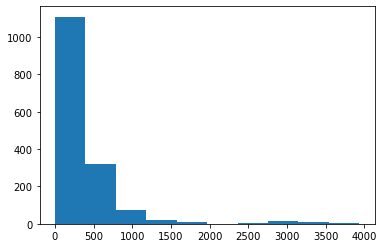

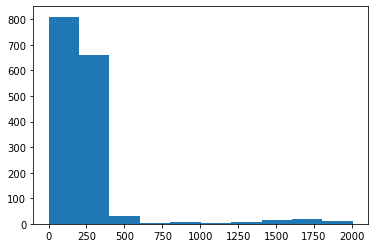

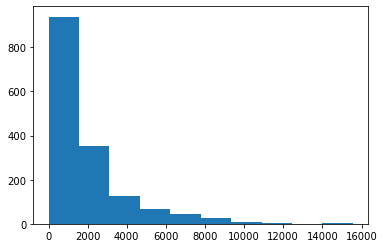

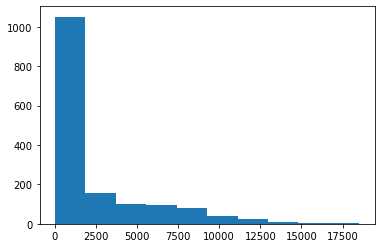

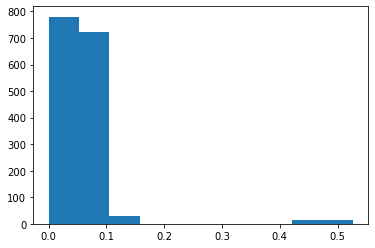

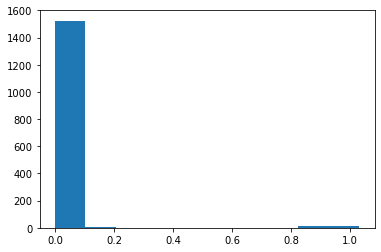

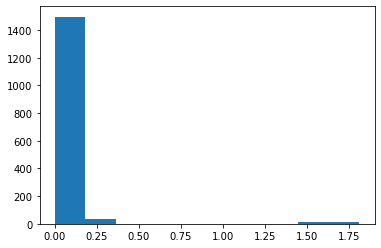

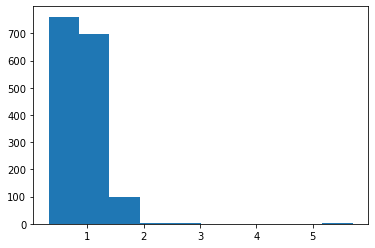

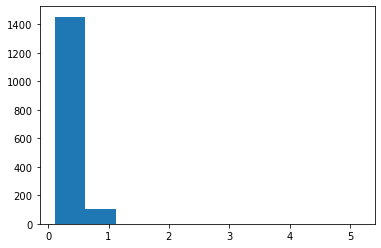

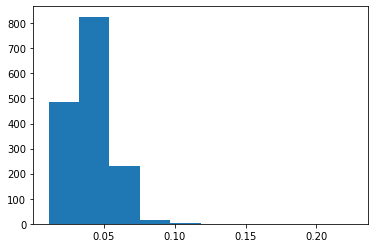

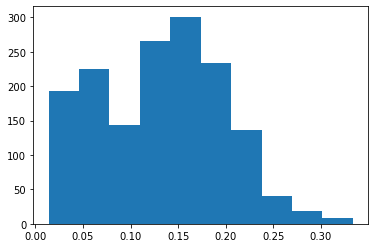

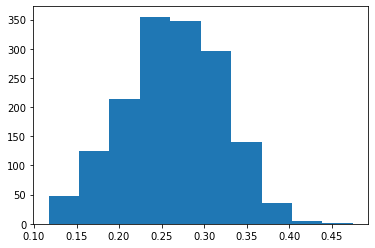

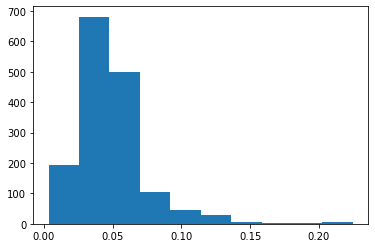

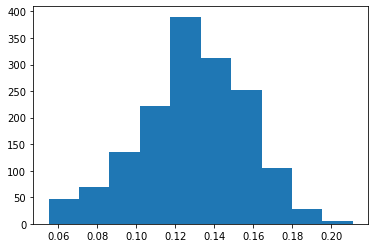

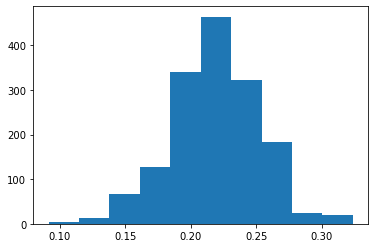

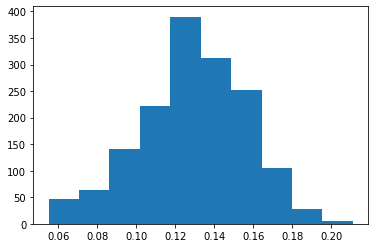

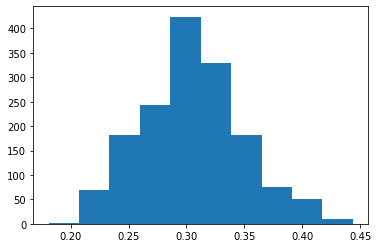

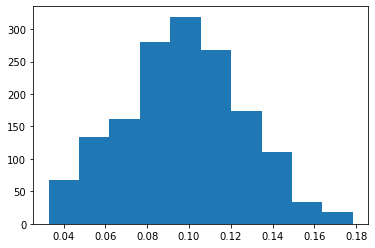

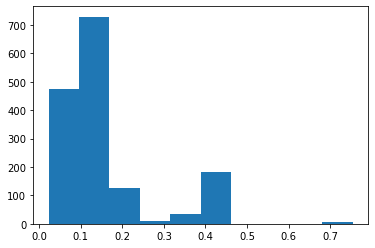

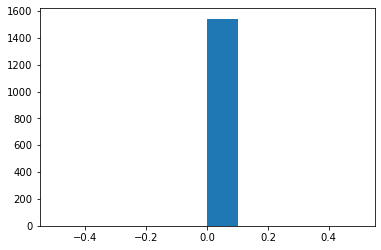

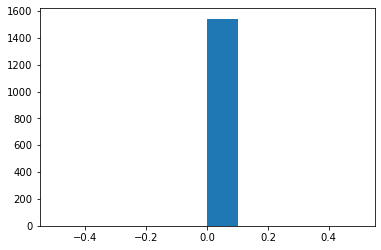

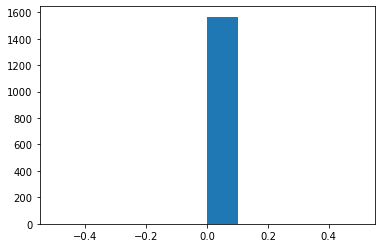

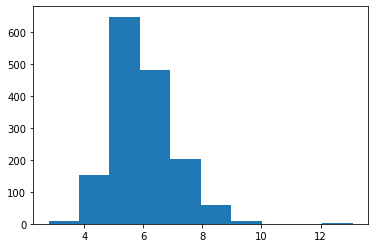

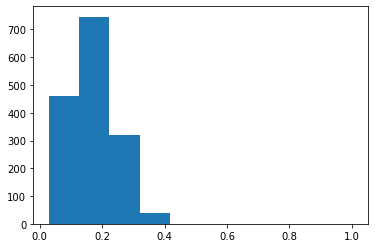

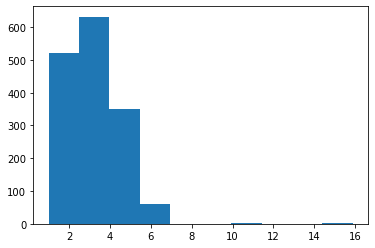

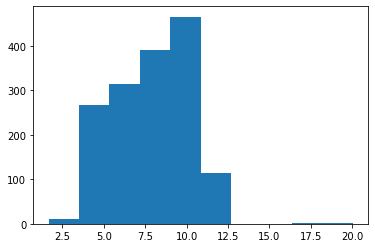

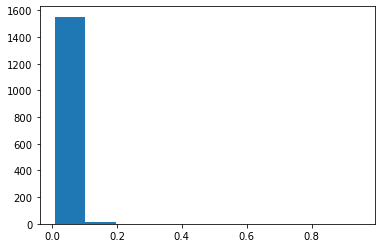

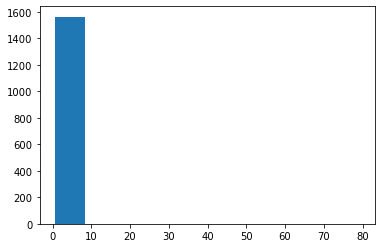

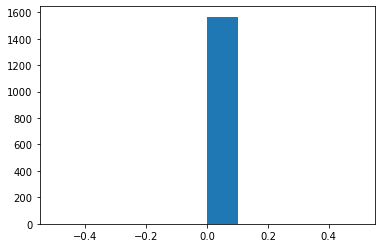

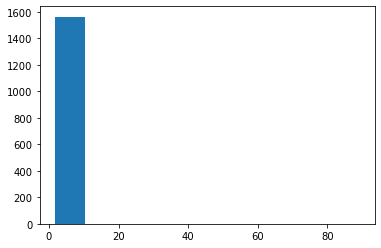

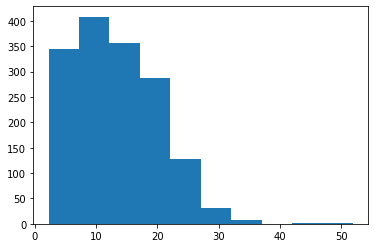

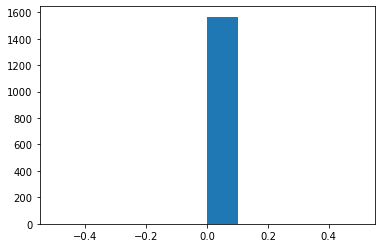

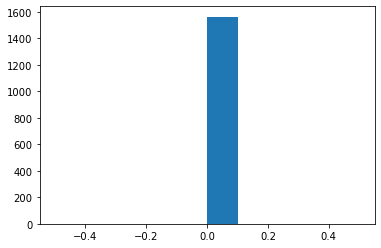

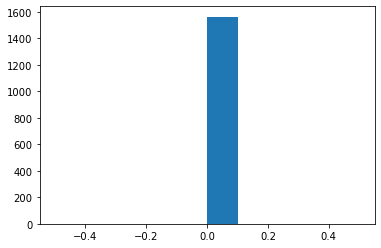

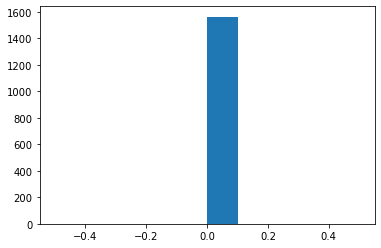

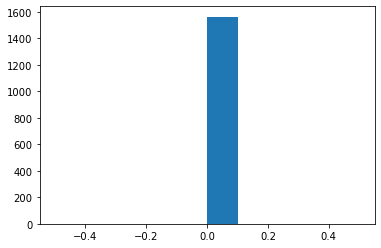

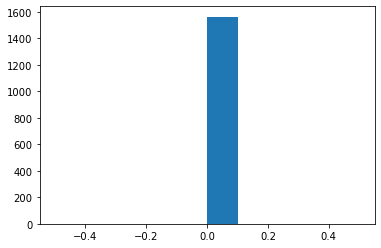

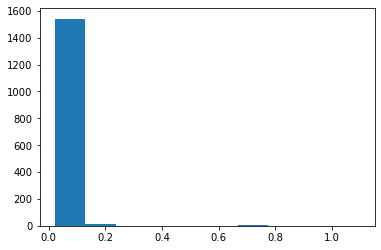

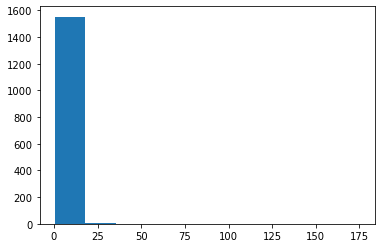

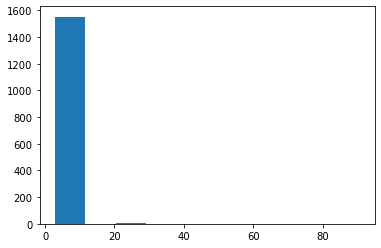

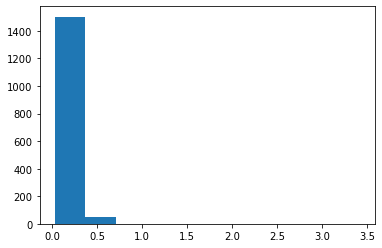

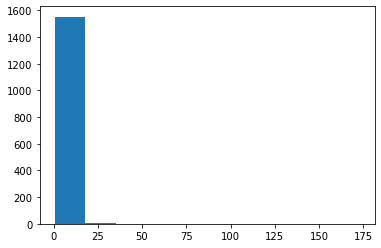

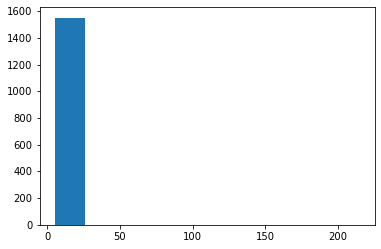

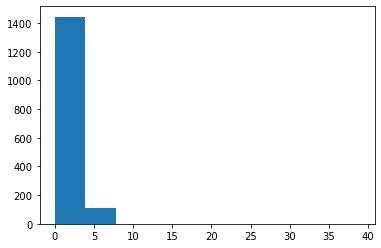

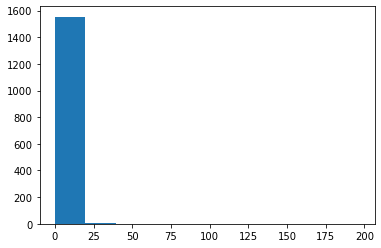

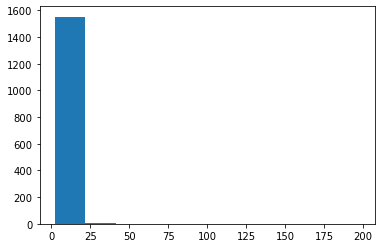

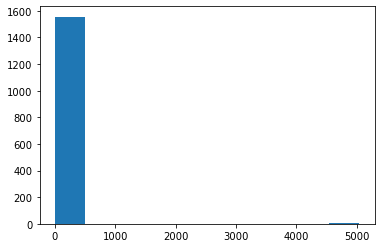

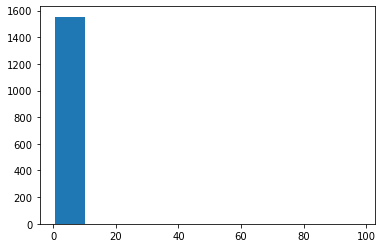

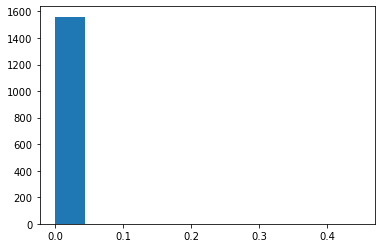

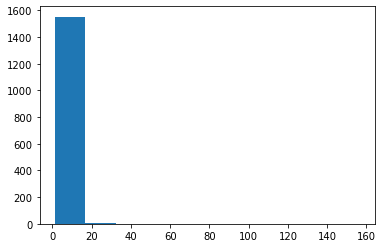

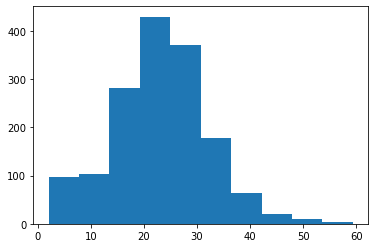

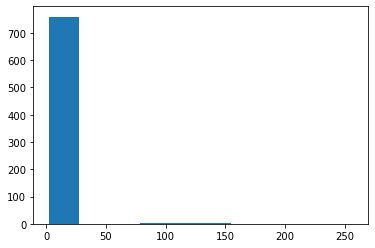

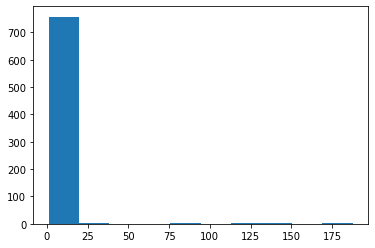

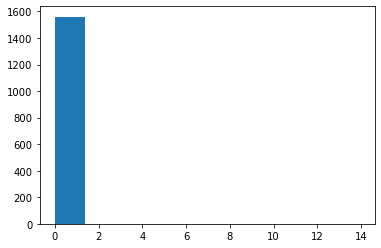

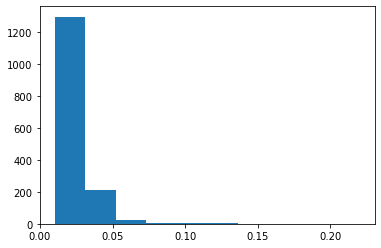

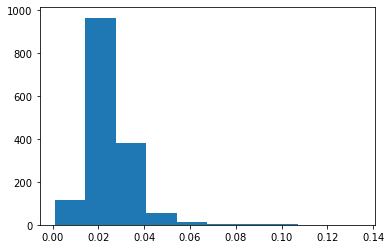

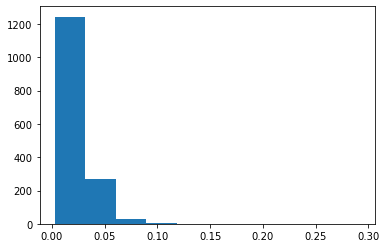

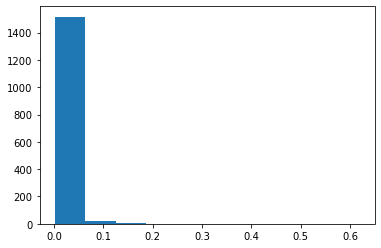

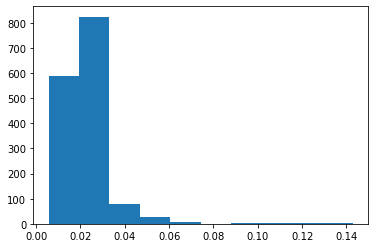

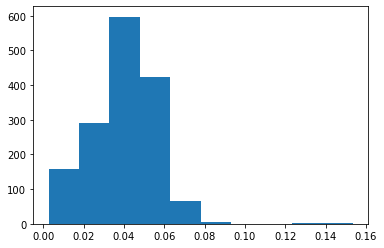

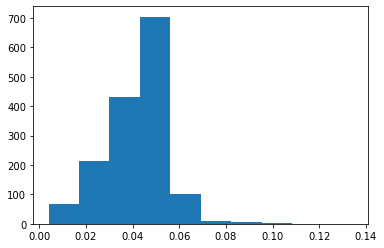

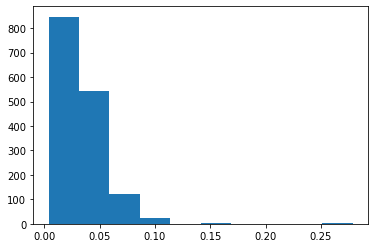

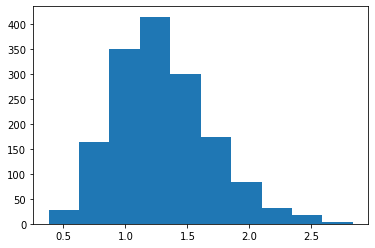

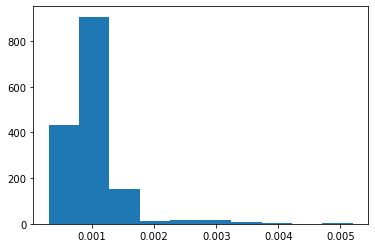

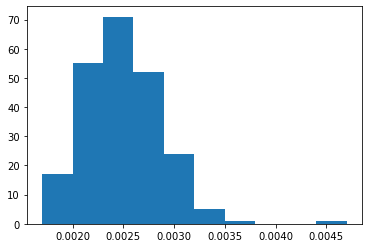

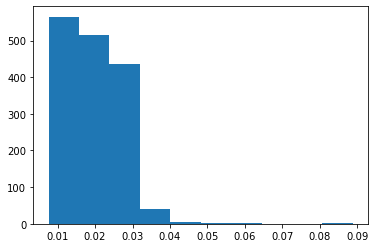

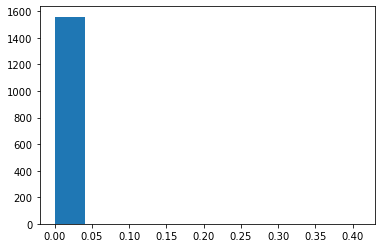

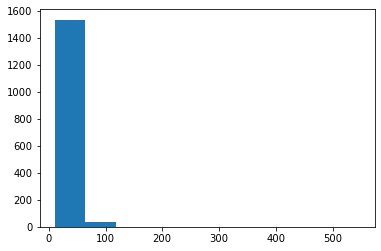

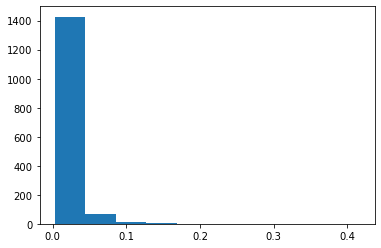

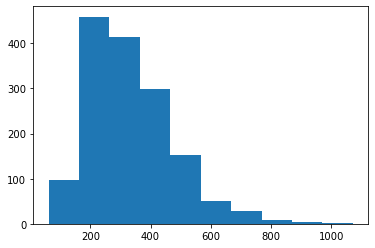

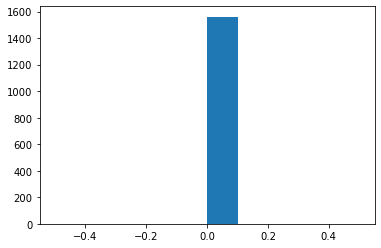

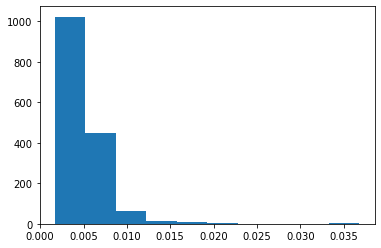

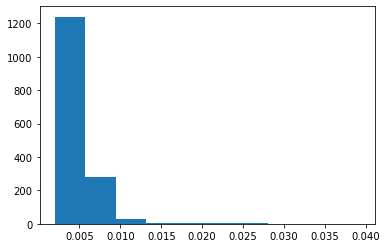

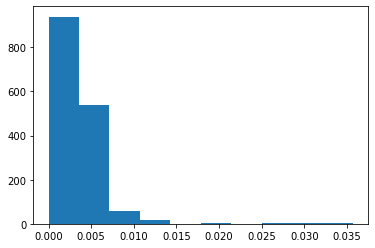

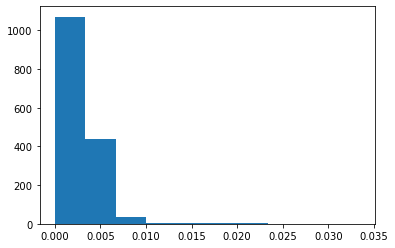

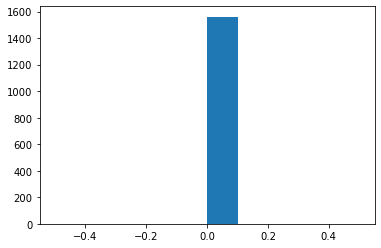

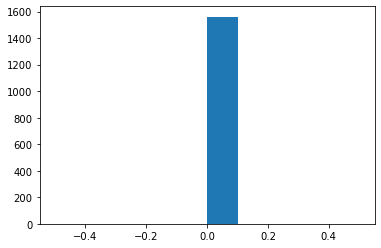

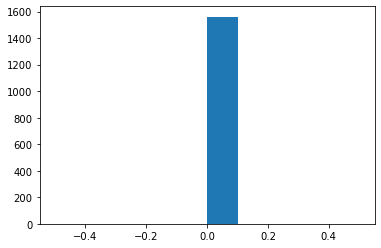

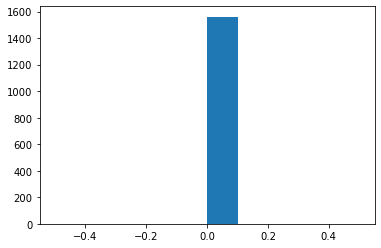

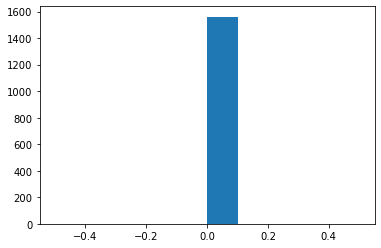

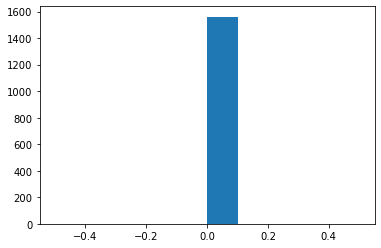

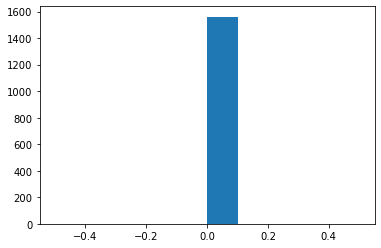

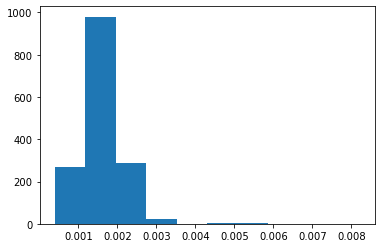

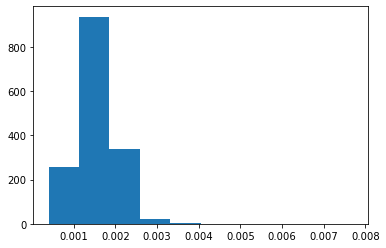

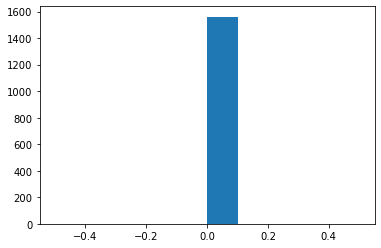

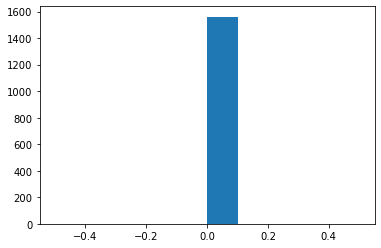

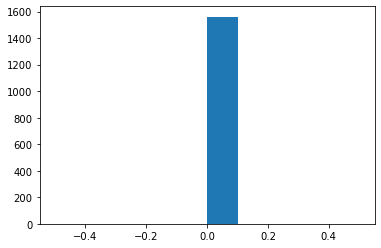

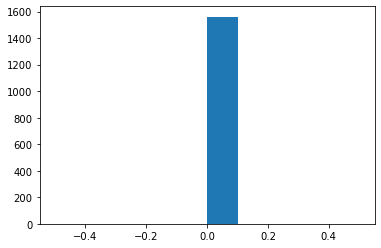

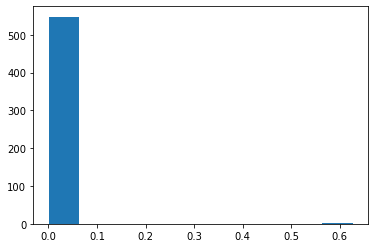

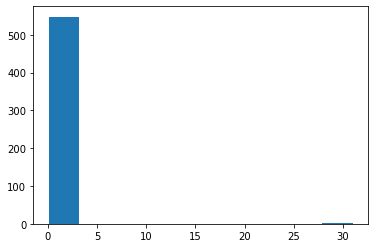

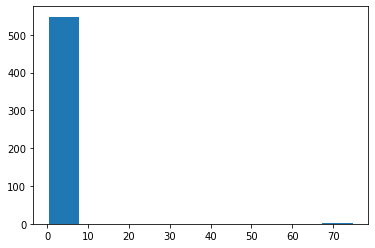

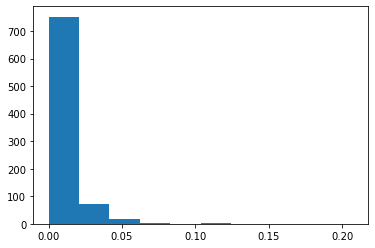

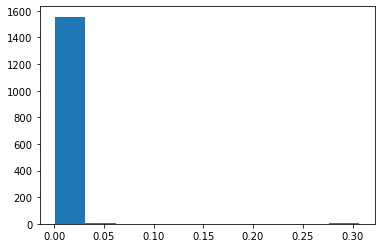

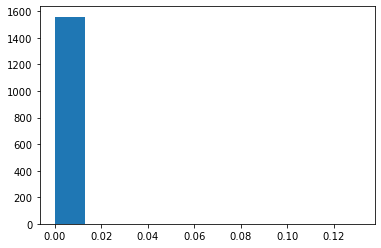

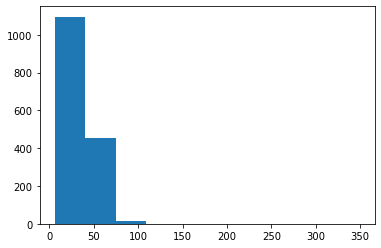

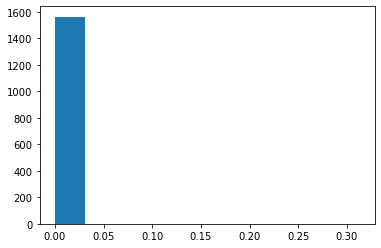

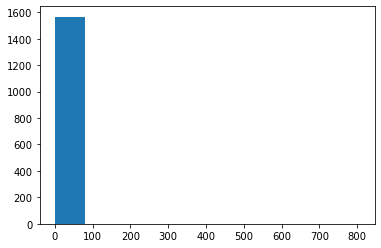

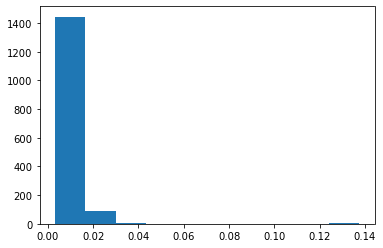

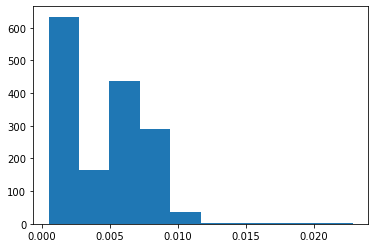

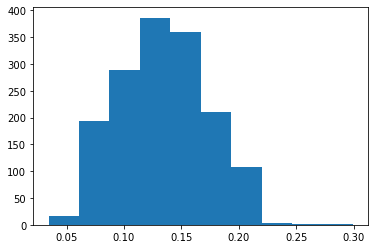

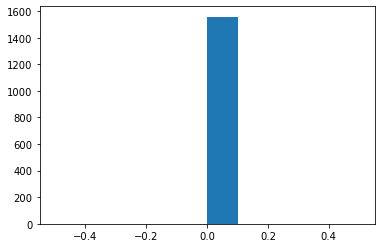

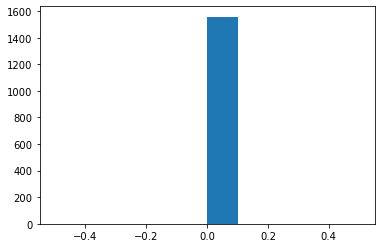

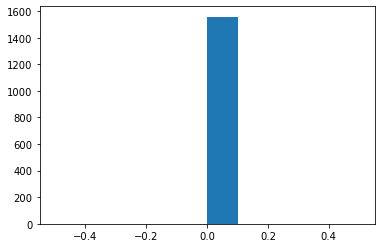

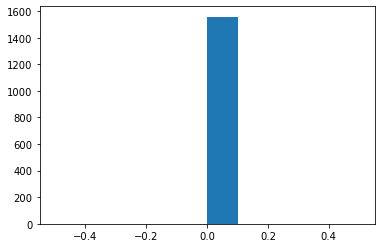

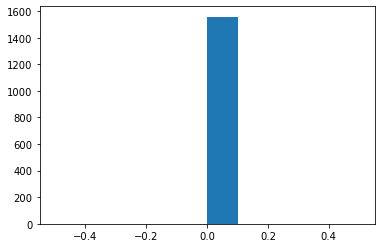

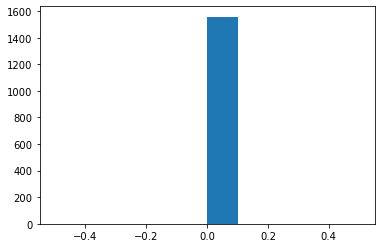

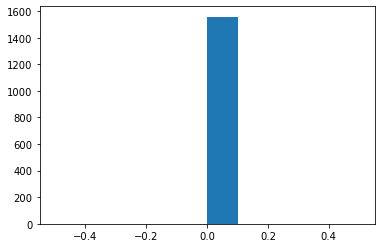

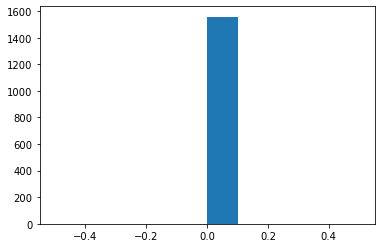

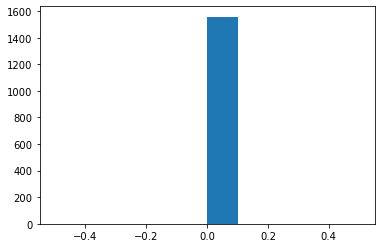

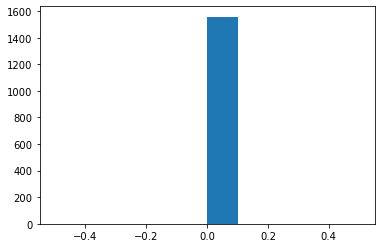

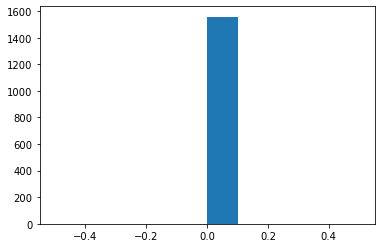

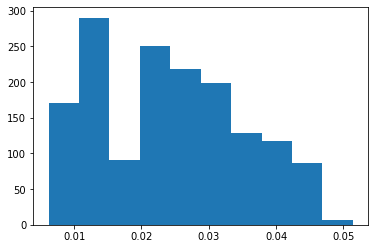

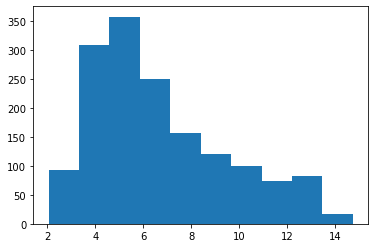

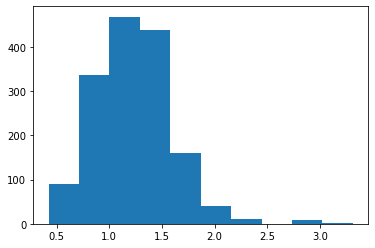

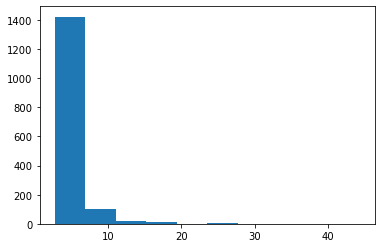

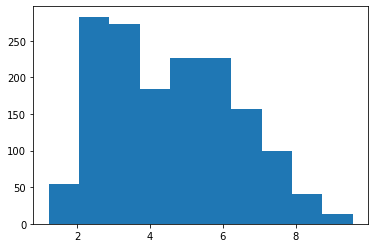

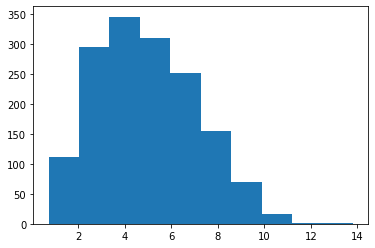

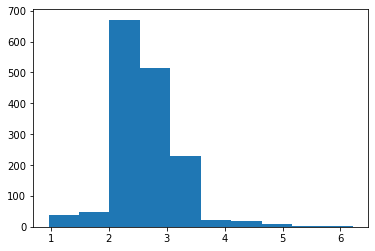

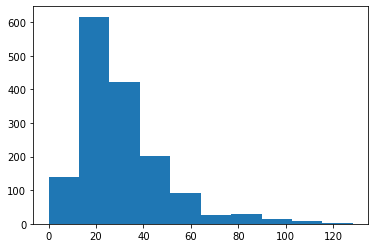

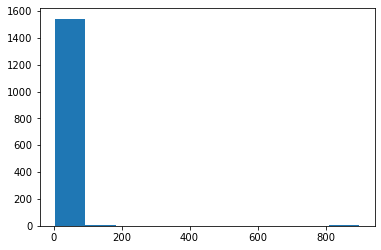

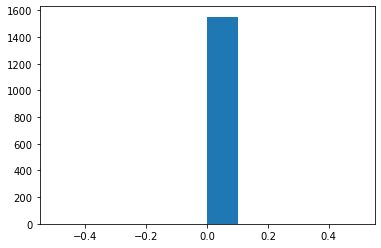

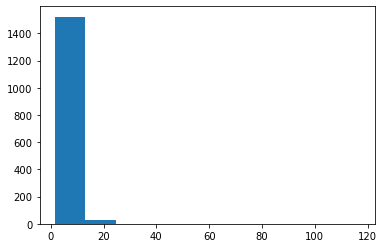

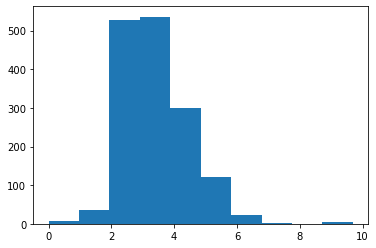

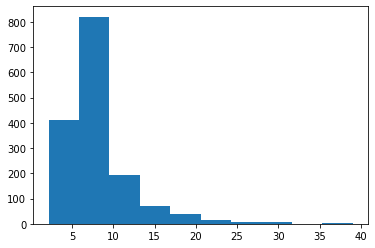

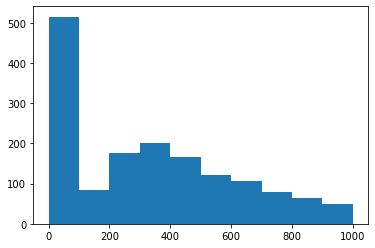

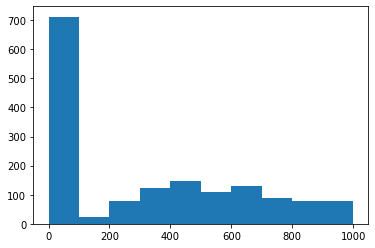

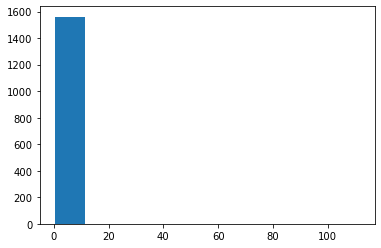

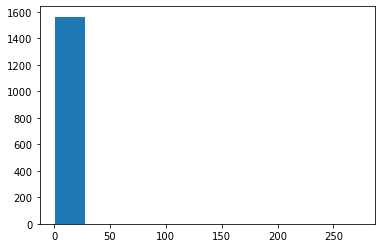

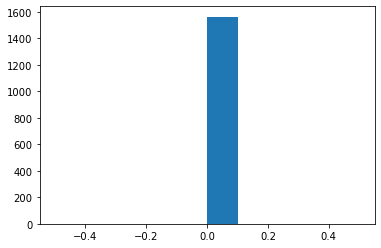

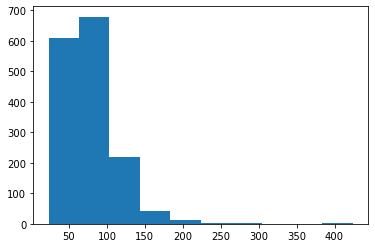

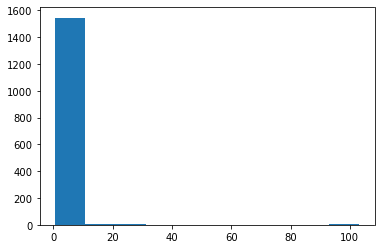

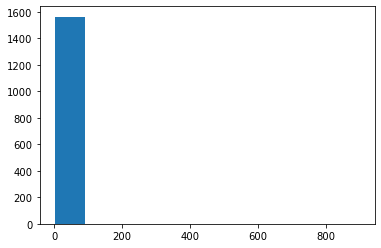

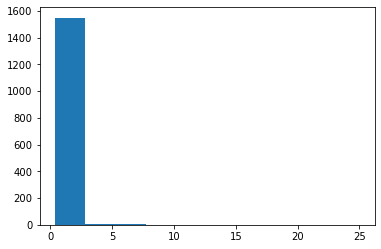

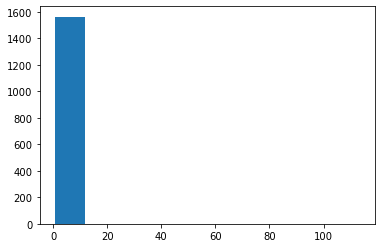

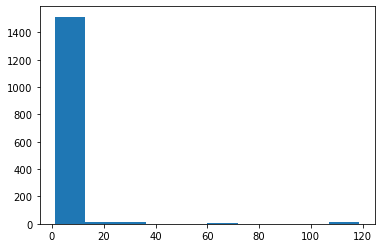

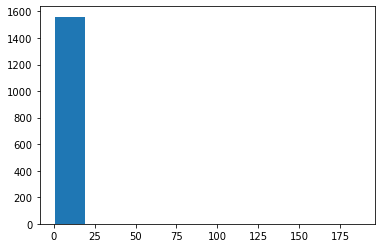

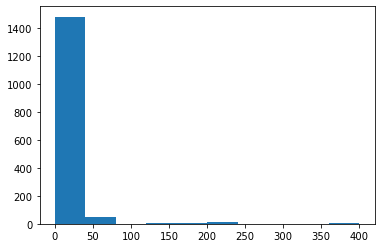

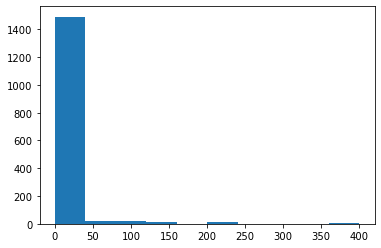

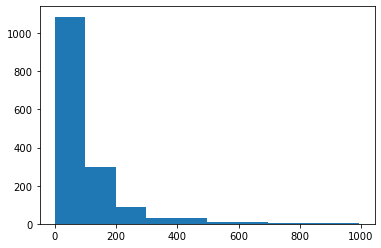

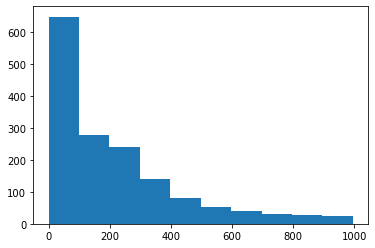

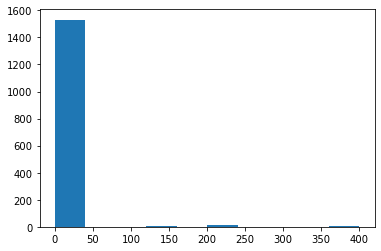

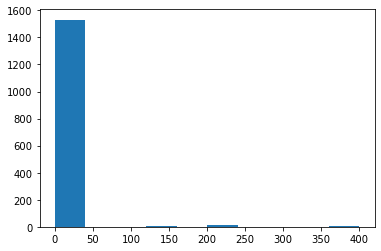

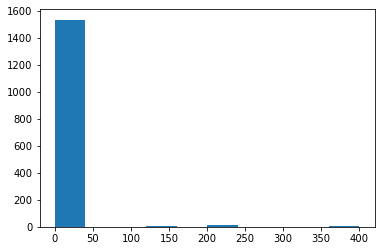

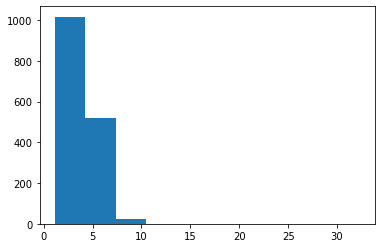

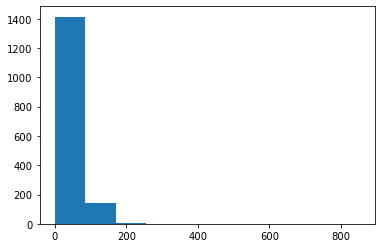

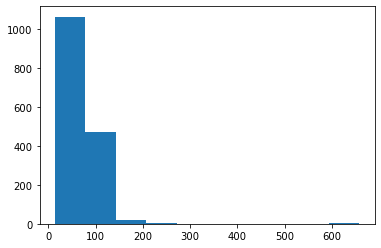

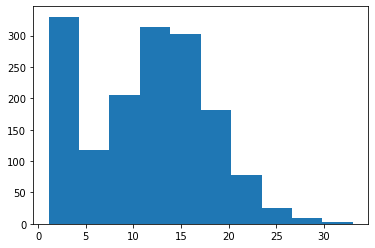

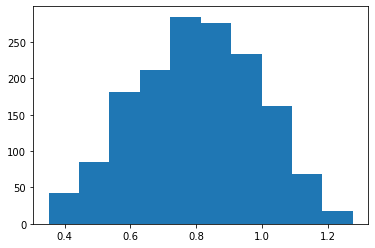

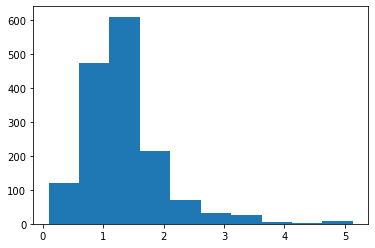

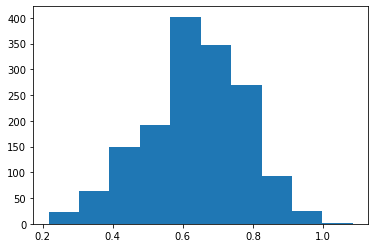

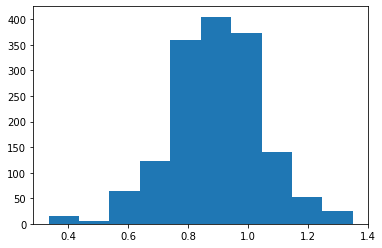

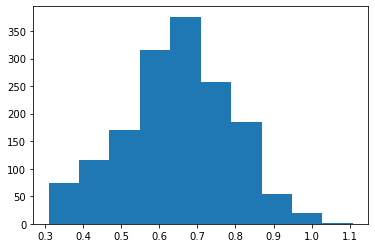

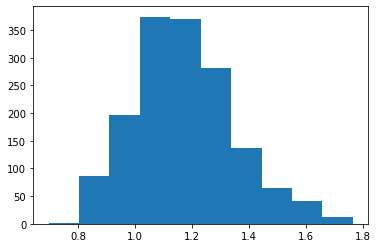

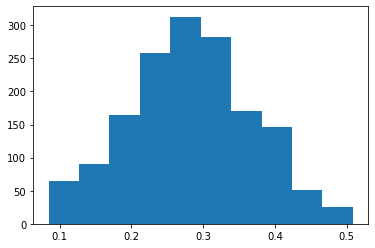

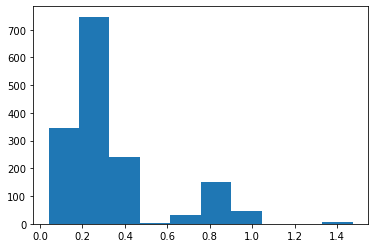

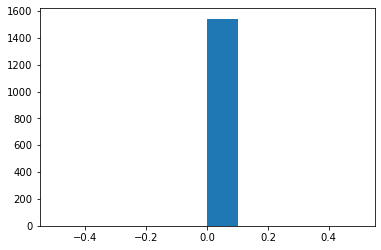

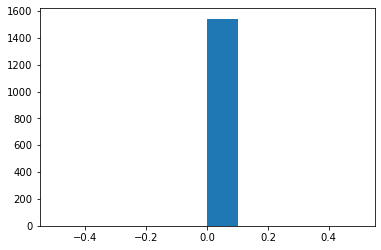

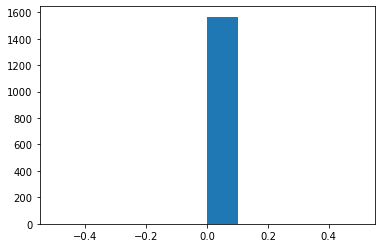

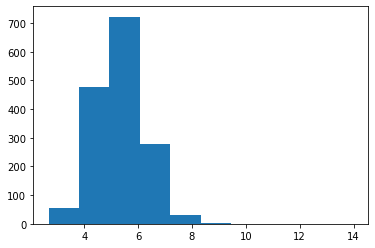

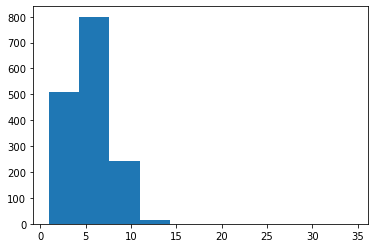

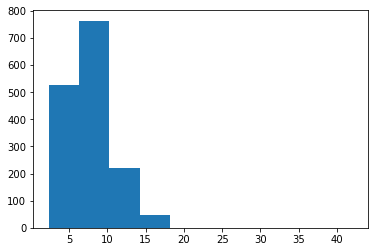

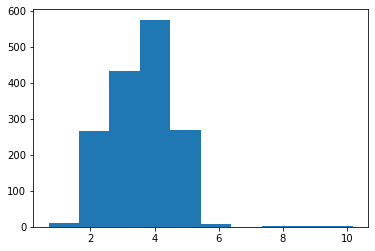

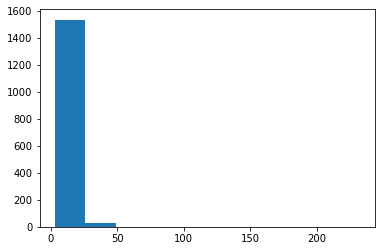

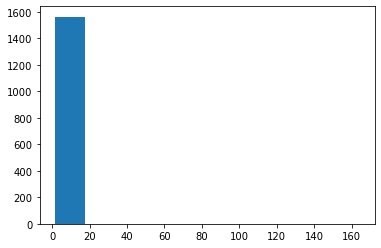

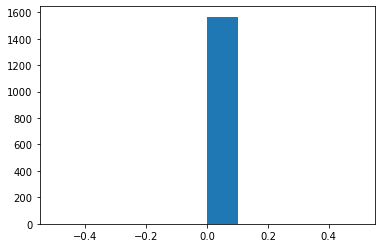

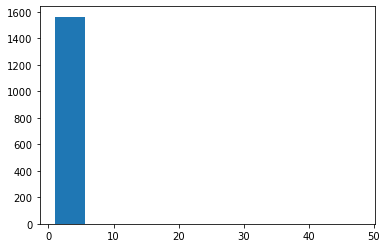

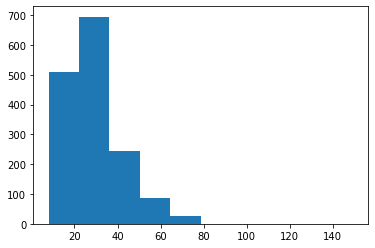

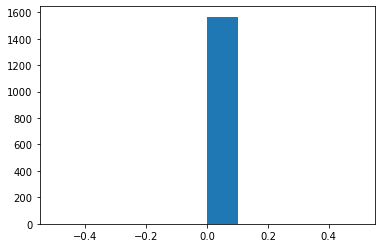

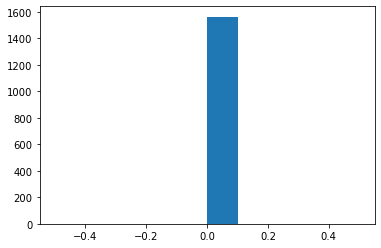

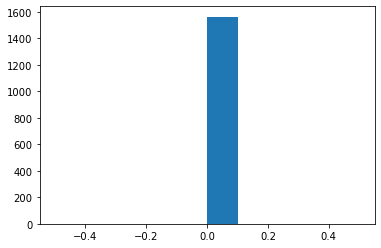

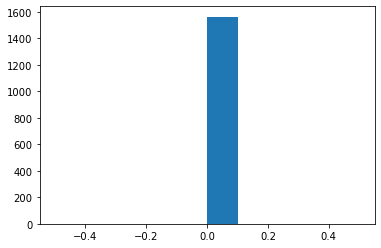

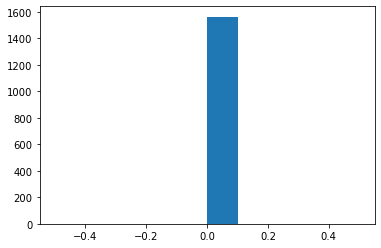

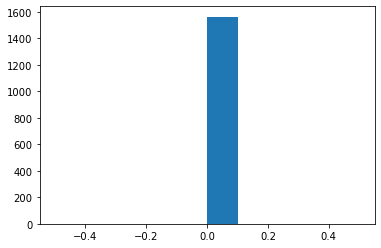

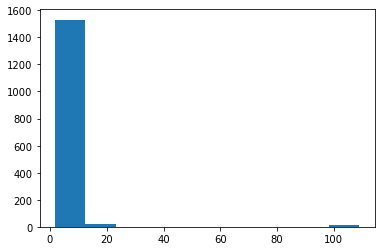

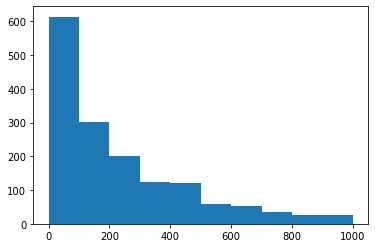

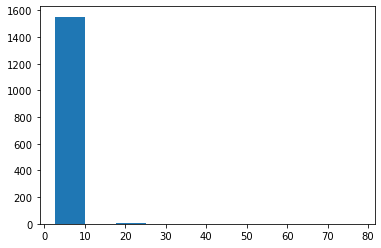

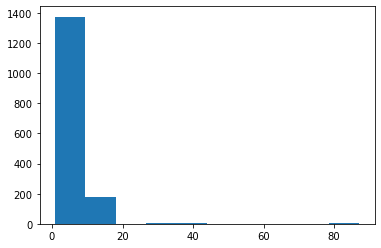

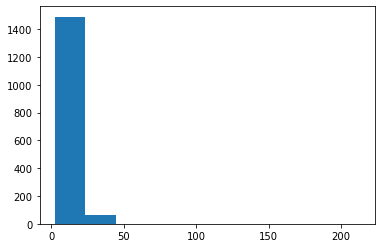

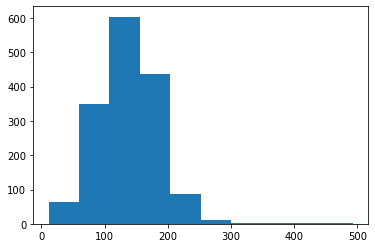

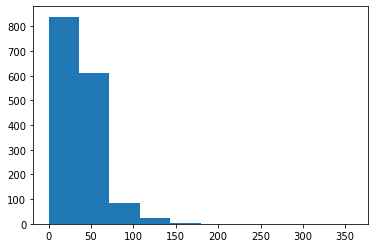

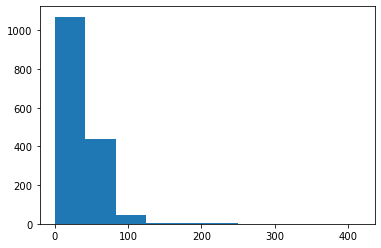

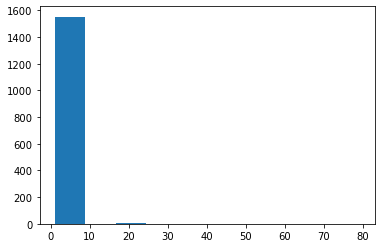

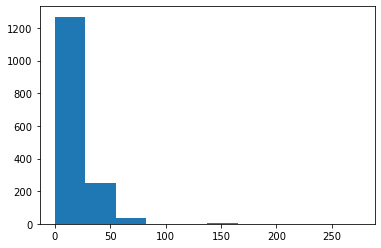

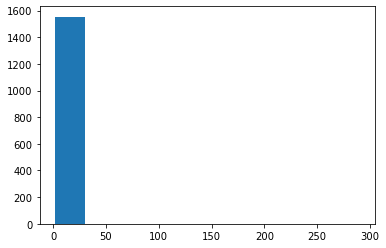

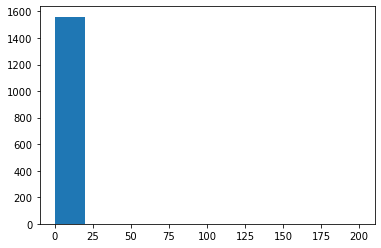

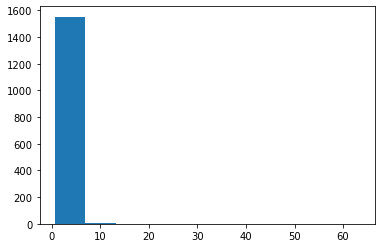

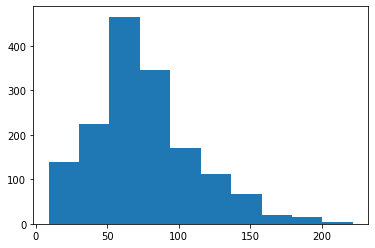

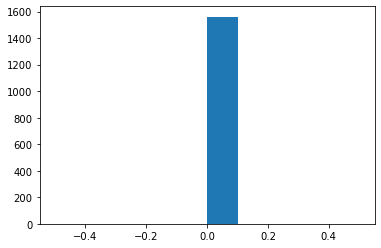

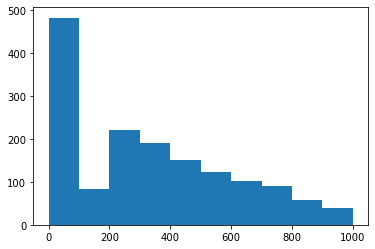

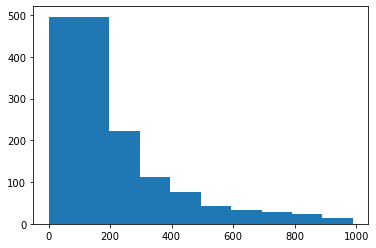

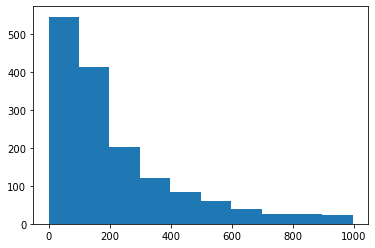

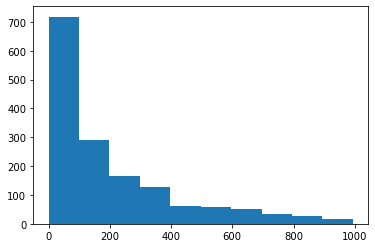

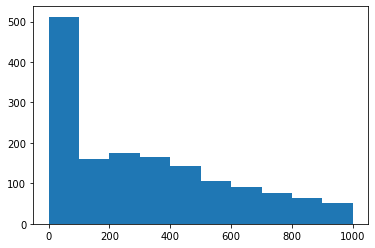

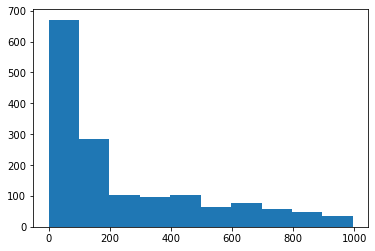

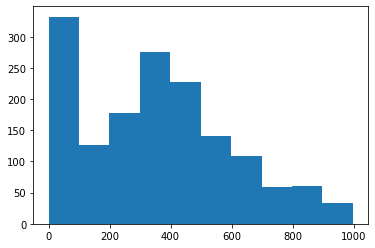

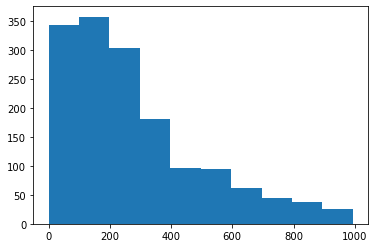

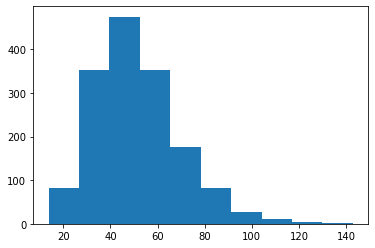

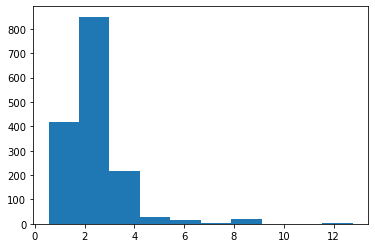

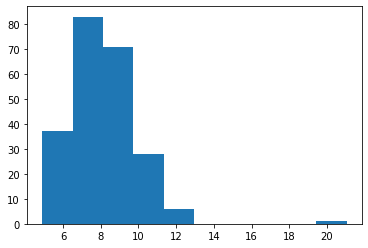

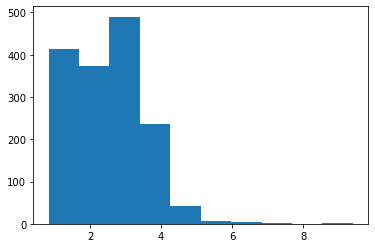

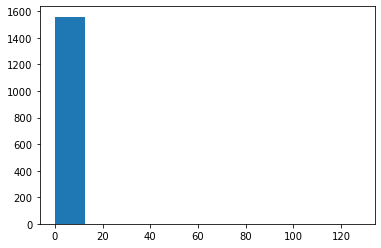

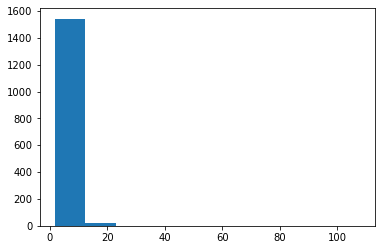

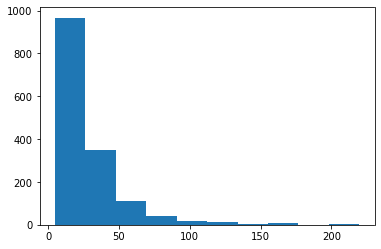

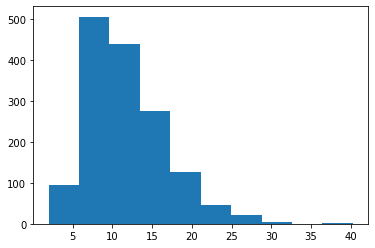

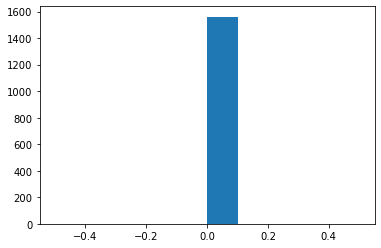

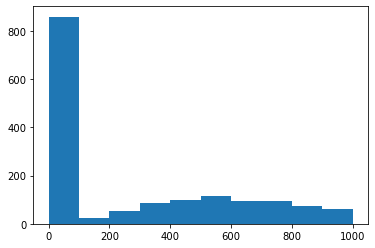

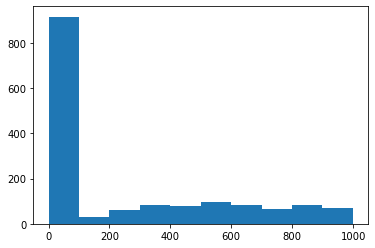

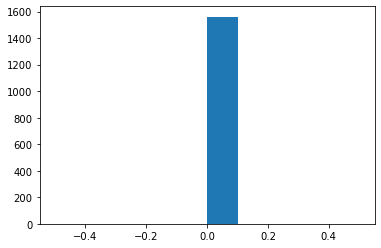

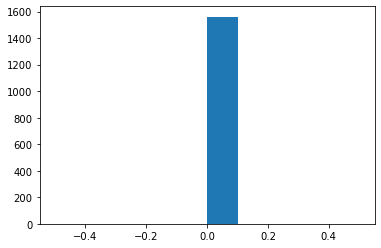

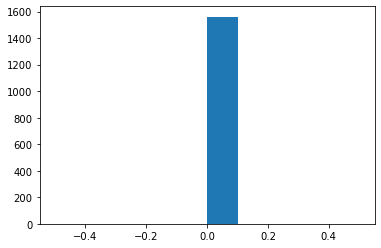

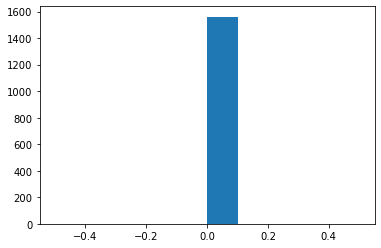

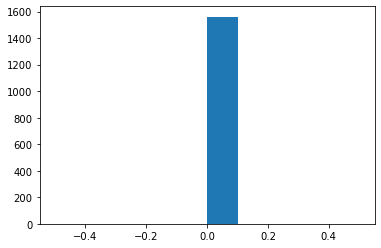

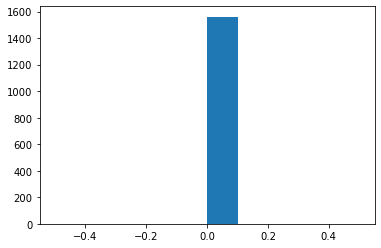

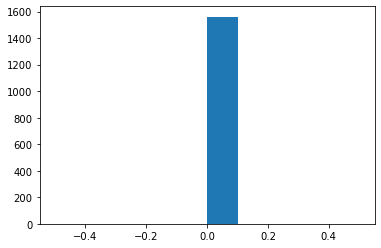

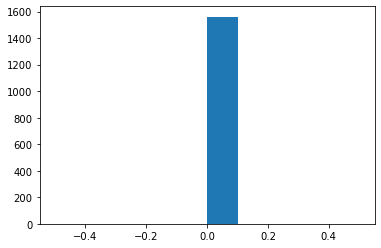

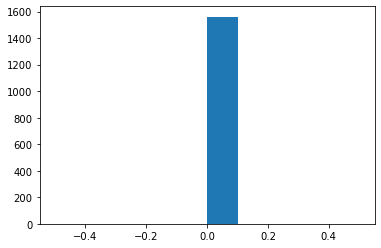

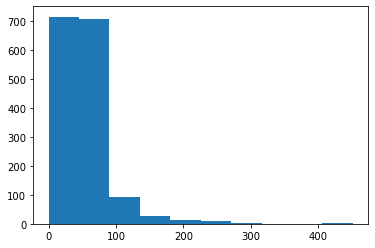

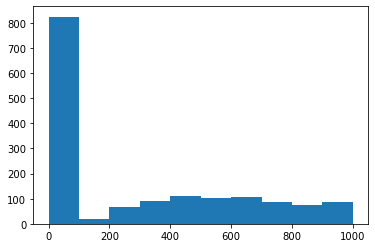

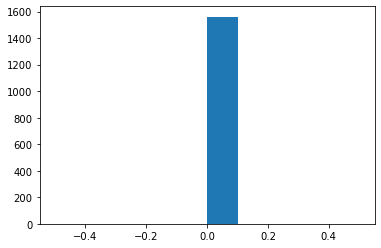

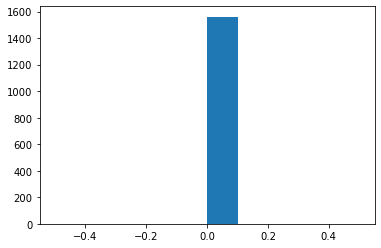

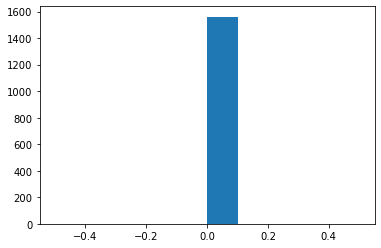

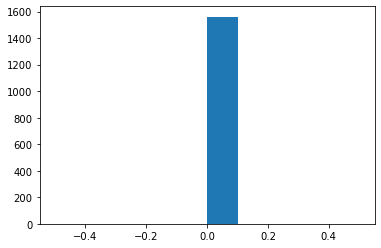

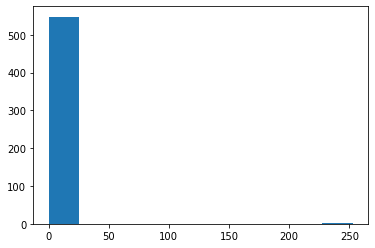

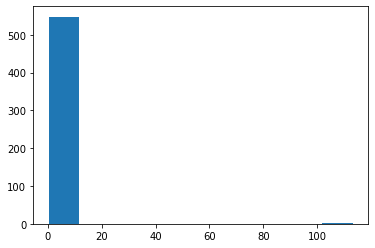

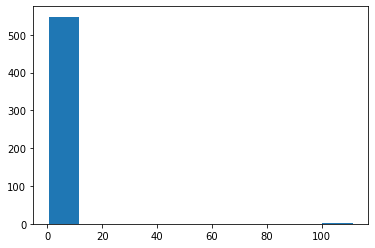

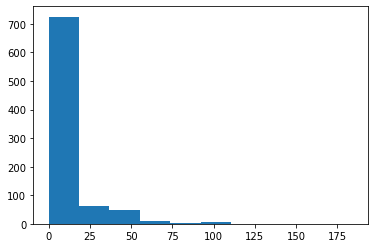

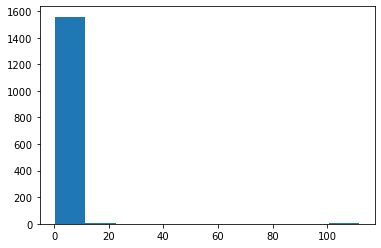

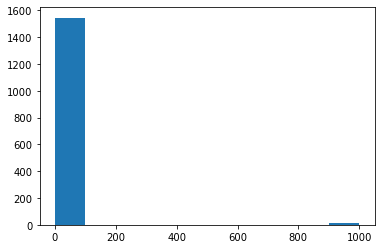

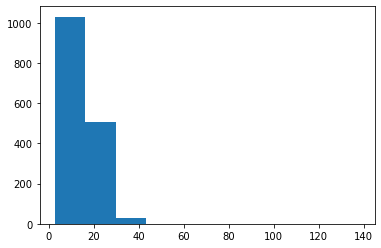

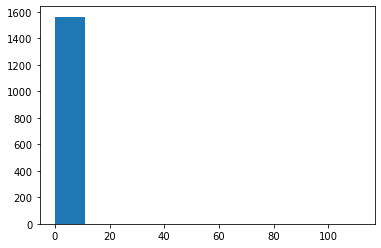

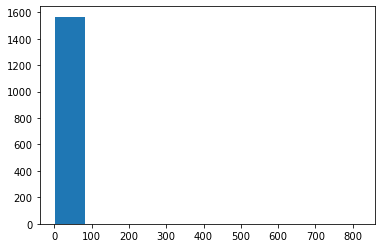

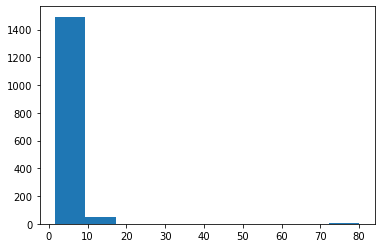

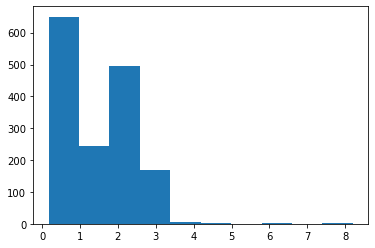

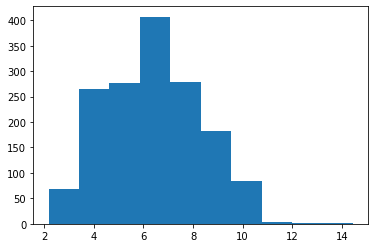

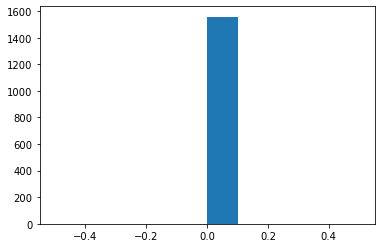

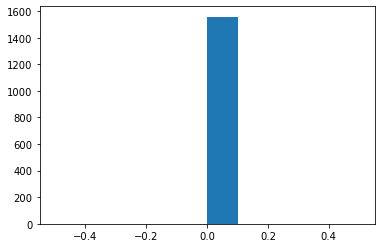

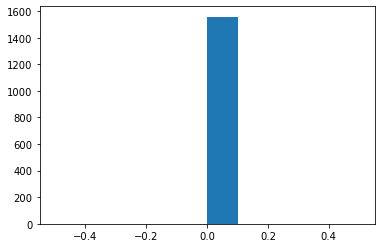

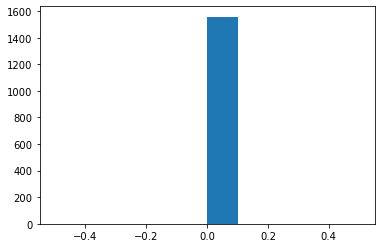

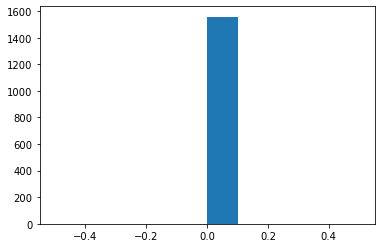

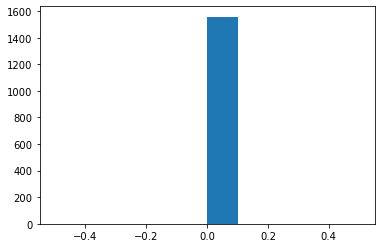

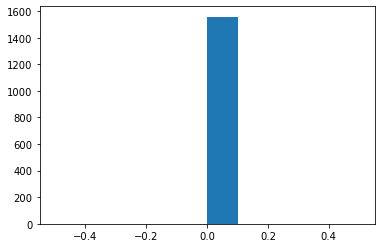

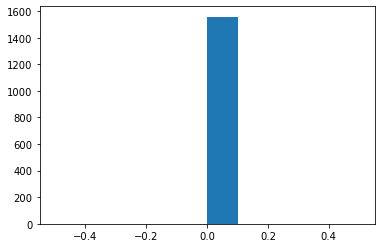

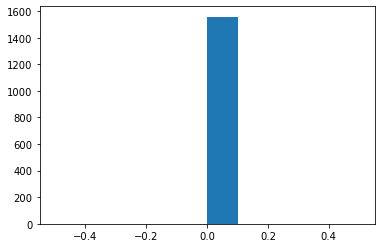

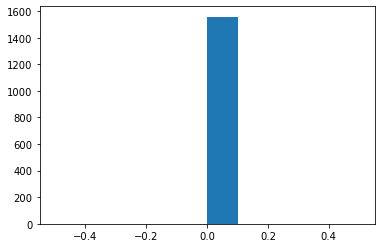

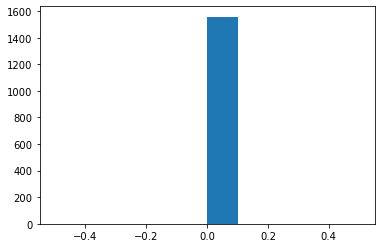

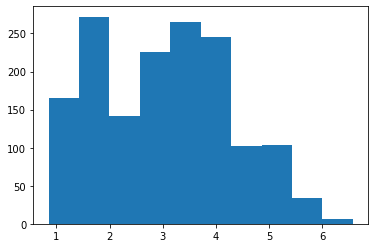

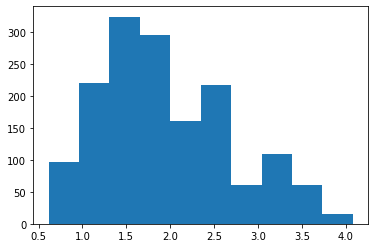

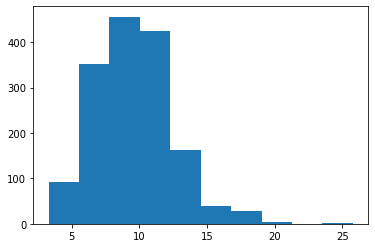

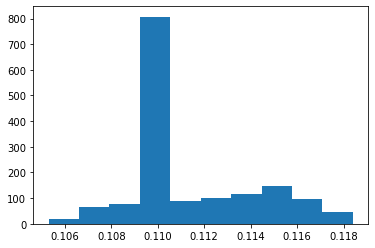

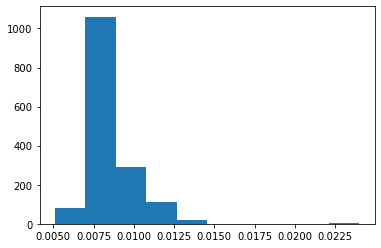

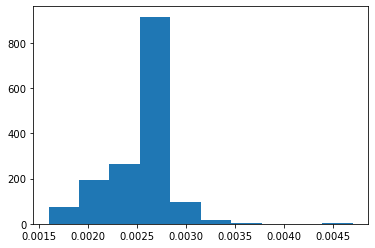

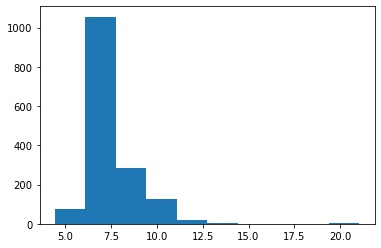

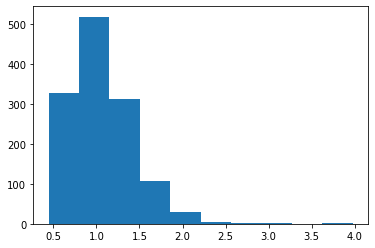

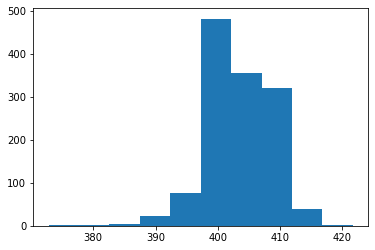

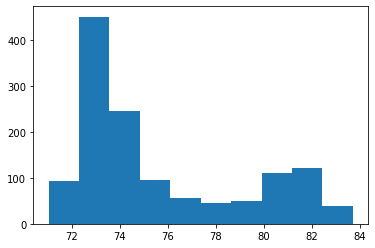

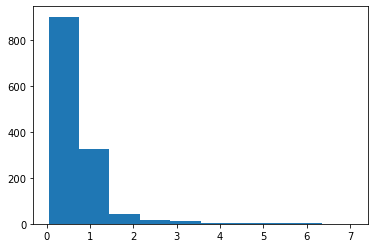

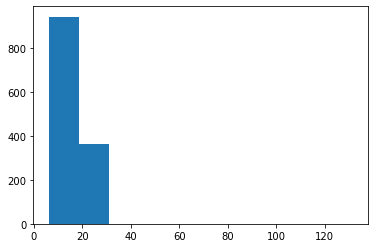

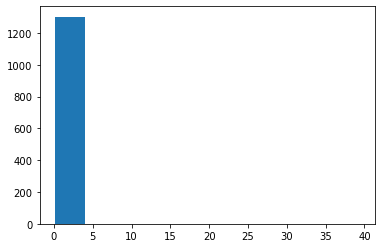

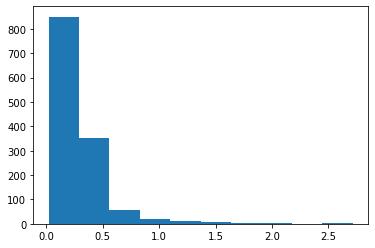

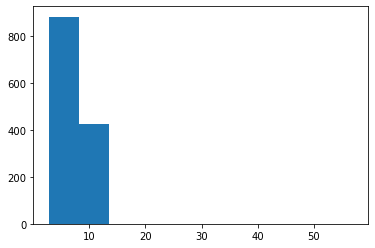

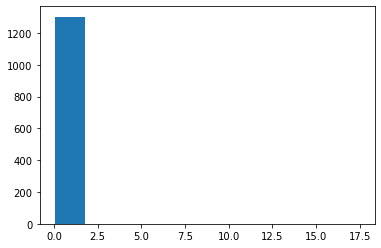

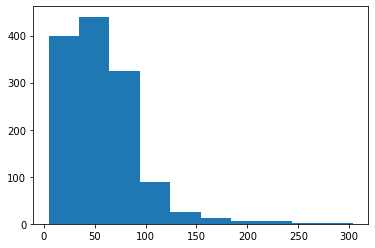

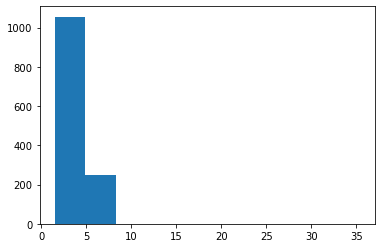

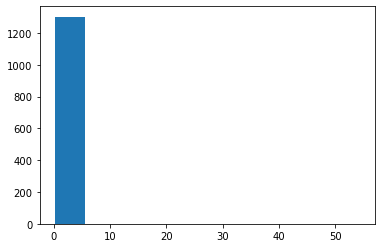

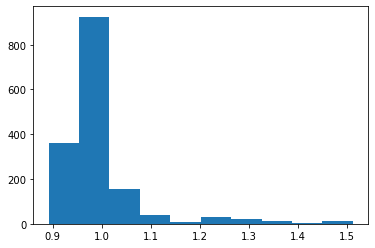

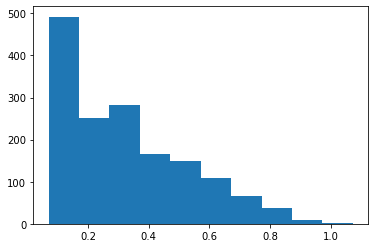

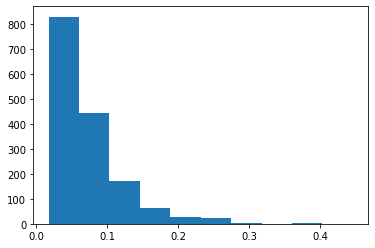

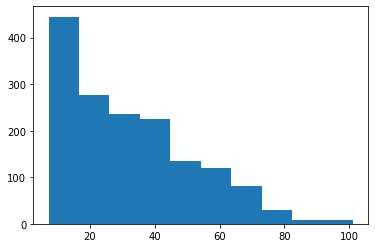

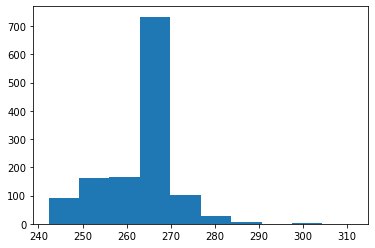

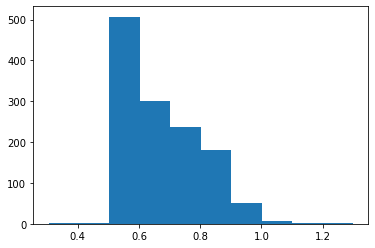

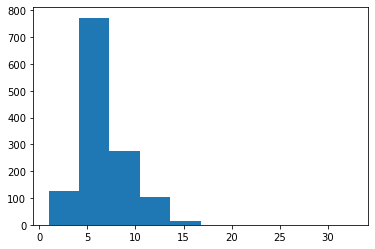

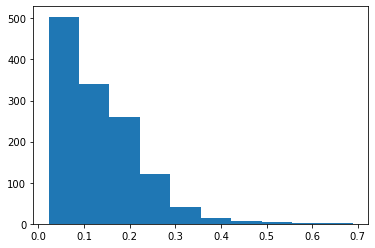

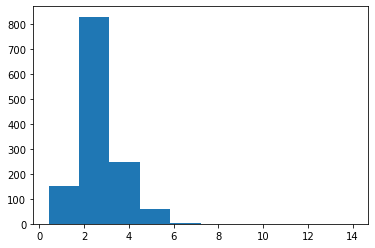

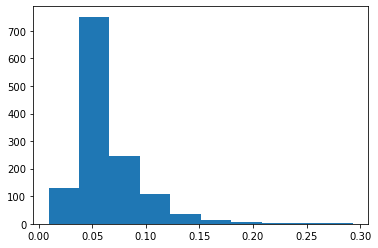

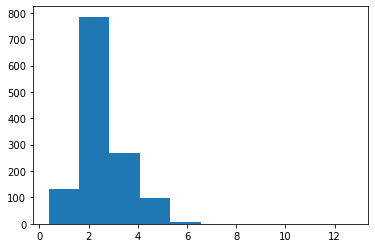

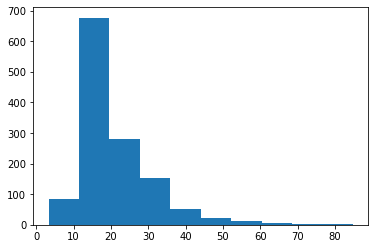

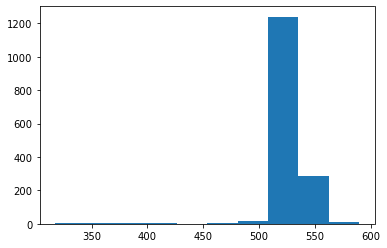

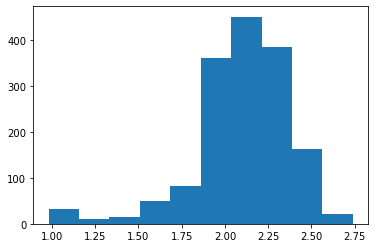

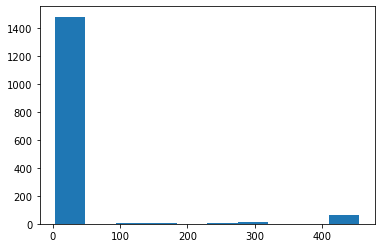

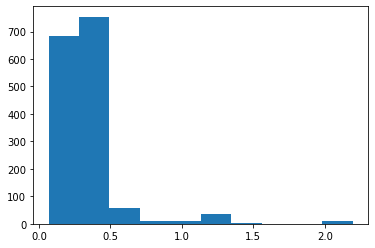

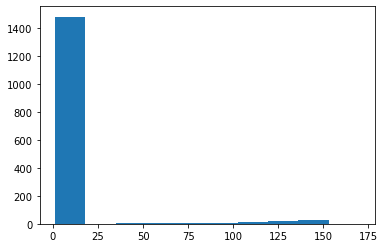

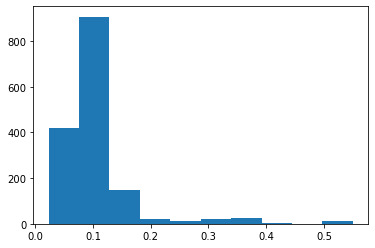

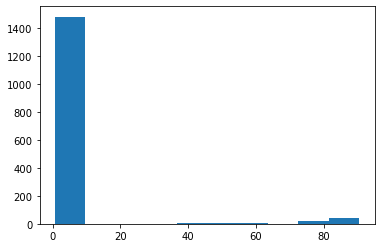

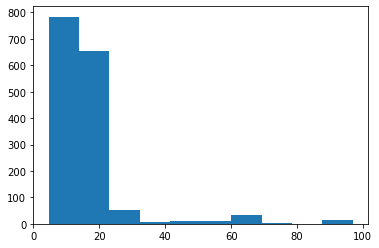

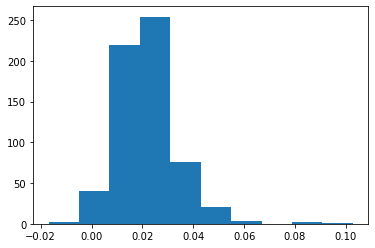

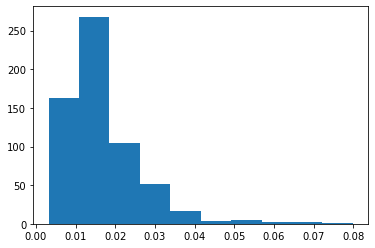

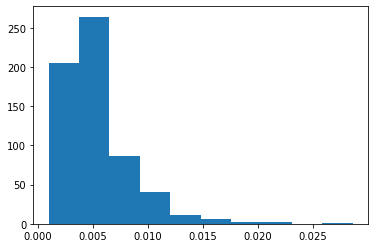

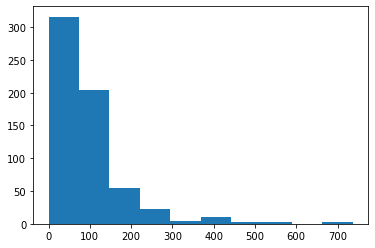

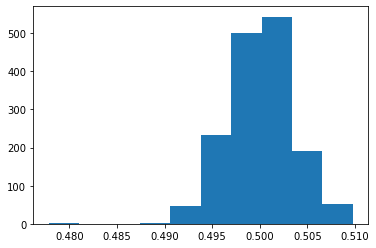

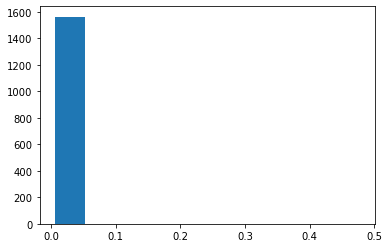

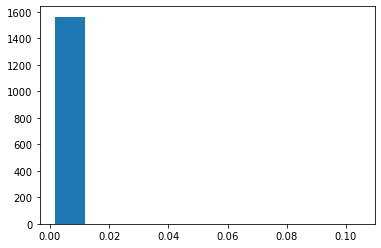

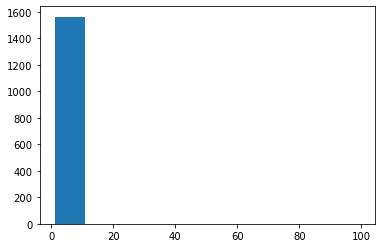

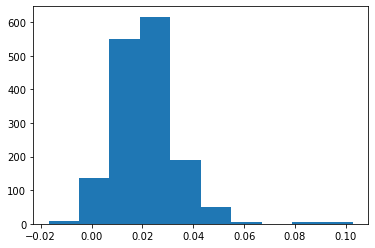

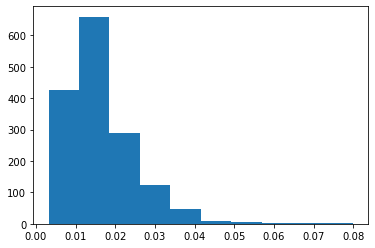

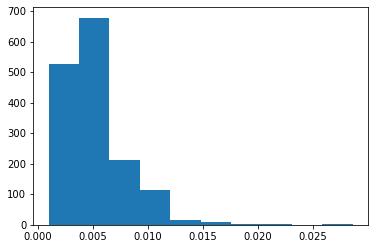

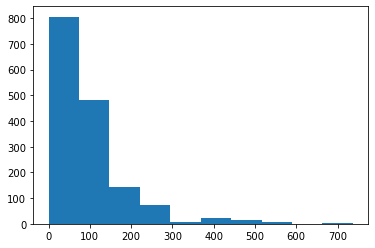

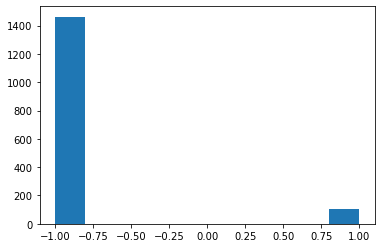

In [125]:
import matplotlib.pyplot as plt

# Select the columns corresponding to features 1 to 590
features = secom.iloc[:, 1:591]

# Plot each feature separately
for column in features.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(features[column])
    plt.show()

In [41]:
X_train=X_train.drop(columns=['timestamp', 'date','time','Result'])
X_test=X_test.drop(columns=['timestamp', 'date','time','Result'])

In [42]:
X_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_577,feature_578,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590
1397,2984.41,2550.88,2192.1889,1435.9611,2.3870,100.0,107.3989,0.1229,1.5613,0.0005,...,1.9267,11.7201,0.5012,0.0126,0.0034,2.5174,0.0106,0.0075,0.0025,71.0842
854,2993.19,2577.23,2204.2333,2110.8288,1.6392,100.0,89.0356,0.1245,1.4788,0.0124,...,1.4410,16.6894,0.5005,0.0130,0.0027,2.6034,0.0281,0.0227,0.0059,80.5639
1256,2914.04,2487.10,2238.1444,1580.6951,1.0062,100.0,91.0489,0.1230,1.4778,0.0095,...,1.4206,9.7546,0.4928,0.0141,0.0039,2.8615,0.0223,0.0152,0.0043,68.2176
1367,2886.03,2499.46,2231.0555,1303.5386,0.9751,100.0,95.7878,0.1198,1.4685,0.0057,...,1.0970,16.9045,0.4985,0.0060,0.0020,1.1975,0.0331,NaN,NaN,141.6245
1486,2984.93,2432.38,2177.4333,2945.8855,1.3321,100.0,83.1700,0.1253,1.3471,-0.0089,...,1.5713,18.1222,0.4994,0.0118,0.0035,2.3612,0.0191,0.0123,0.0040,64.6789


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 1397 to 996
Columns: 566 entries, feature_1 to feature_590
dtypes: float64(566)
memory usage: 5.4 MB


In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 87 to 433
Columns: 590 entries, feature_1 to feature_590
dtypes: float64(590)
memory usage: 1.4 MB


In [45]:


# Remove constant columns
X_train = X_train.loc[:, X_train.nunique() > 1]


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 1397 to 996
Columns: 444 entries, feature_1 to feature_590
dtypes: float64(444)
memory usage: 4.3 MB


In [47]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler().fit(X_train)

In [ ]:
#X_test = pd.DataFrame(scaler.transform(X_test), columns=column_names) -->

In [48]:

from sklearn.impute import KNNImputer

# Create the KNN imputer object
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Impute the missing values
X_train_imputed = imputer.fit_transform(X_train)

# Convert the numpy array back to a pandas dataframe
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

In [49]:
statistics = X_train_imputed.describe()
print (statistics)

         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000   
mean   3012.867603  2496.667425  2200.811398  1396.079123     4.880944   
std      72.264596    78.947952    29.121155   440.808954    62.725539   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2965.410000  2453.910000  2181.044400  1084.377900     1.015180   
50%    3010.400000  2500.260000  2201.066700  1283.370100     1.310100   
75%    3054.520000  2539.010000  2218.577800  1591.223500     1.525700   
max    3299.400000  2846.440000  2315.266700  3715.041700  1114.536600   

         feature_7    feature_8    feature_9   feature_10   feature_11  ...  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000  ...   
mean    101.021897     0.121484     1.464673    -0.000887     0.000053  ...   
std       6.140316     0.011068     0.073388     0.014760     0.009206  ...   
min      82.13110

In [71]:
X_train_imputed.isna().sum().sum()

0

In [51]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Columns: 444 entries, feature_1 to feature_590
dtypes: float64(444)
memory usage: 4.2 MB


In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 87 to 433
Columns: 590 entries, feature_1 to feature_590
dtypes: float64(590)
memory usage: 1.4 MB


In [53]:
# Reindex the columns of the testing data to match the order of the training data
X_test = pd.DataFrame(X_test, columns=X_train_imputed.columns)

In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 87 to 433
Columns: 444 entries, feature_1 to feature_590
dtypes: float64(444)
memory usage: 1.1 MB


In [55]:
# Impute the missing values in the test dataset
X_test_imputed = imputer.transform(X_test)

# Convert the numpy array back to a pandas DataFrame
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [56]:
X_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Columns: 444 entries, feature_1 to feature_590
dtypes: float64(444)
memory usage: 1.1 MB


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 1397 to 996
Columns: 444 entries, feature_1 to feature_590
dtypes: float64(444)
memory usage: 4.3 MB


In [69]:
X_test_imputed.isna().sum().sum()

0

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 56.6/56.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [149]:
import numpy as np
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assuming you have your feature data in X_train_imputed and target variable in y_train

# Standardize the feature data
scaler = StandardScaler().fit(X_train_imputed)
X_train_scaled = scaler.transform(X_train_imputed)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Create an instance of BorutaPy
boruta = BorutaPy(rf, n_estimators='auto', max_iter=1000, verbose=2, random_state=1)

# Apply Boruta to select important features
boruta.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train_imputed.columns[boruta.support_].tolist()



Iteration: 	1 / 1000
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	2 / 1000
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	3 / 1000
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	4 / 1000
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	5 / 1000
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	6 / 1000
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	7 / 1000
Confirmed: 	0
Tentative: 	444
Rejected: 	0
Iteration: 	8 / 1000
Confirmed: 	0
Tentative: 	7
Rejected: 	437
Iteration: 	9 / 1000
Confirmed: 	1
Tentative: 	6
Rejected: 	437
Iteration: 	10 / 1000
Confirmed: 	1
Tentative: 	6
Rejected: 	437
Iteration: 	11 / 1000
Confirmed: 	1
Tentative: 	6
Rejected: 	437
Iteration: 	12 / 1000
Confirmed: 	1
Tentative: 	5
Rejected: 	438
Iteration: 	13 / 1000
Confirmed: 	1
Tentative: 	5
Rejected: 	438
Iteration: 	14 / 1000
Confirmed: 	1
Tentative: 	5
Rejected: 	438
Iteration: 	15 / 1000
Confirmed: 	1
Tentative: 	5
Rejected: 	438
Iteration: 	16 / 1000
Confirmed: 	

Iteration: 	128 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	129 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	130 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	131 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	132 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	133 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	134 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	135 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	136 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	137 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	138 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	139 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	140 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	141 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	142 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration:

Iteration: 	253 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	254 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	255 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	256 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	257 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	258 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	259 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	260 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	261 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	262 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	263 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	264 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	265 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	266 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	267 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration:

Iteration: 	379 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	380 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	381 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	382 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	383 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	384 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	385 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	386 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	387 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	388 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	389 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	390 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	391 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	392 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	393 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration:

Iteration: 	505 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	506 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	507 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	508 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	509 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	510 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	511 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	512 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	513 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	514 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	515 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	516 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	517 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	518 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	519 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration:

Iteration: 	631 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	632 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	633 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	634 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	635 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	636 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	637 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	638 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	639 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	640 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	641 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	642 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	643 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	644 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	645 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration:

Iteration: 	756 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	757 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	758 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	759 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	760 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	761 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	762 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	763 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	764 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	765 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	766 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	767 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	768 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	769 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	770 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration:

Iteration: 	882 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	883 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	884 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	885 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	886 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	887 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	888 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	889 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	890 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	891 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	892 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	893 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	894 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	895 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration: 	896 / 1000
Confirmed: 	5
Tentative: 	1
Rejected: 	438
Iteration:

In [150]:
print(selected_features)

['feature_60', 'feature_65', 'feature_66', 'feature_157', 'feature_268']


In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_imputed)
X_train_scaled = scaler.transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [173]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Assuming you have your feature data in X_train and target variable in y_train

# Convert y_train to numpy array
y_train_imputed = np.array(y_train)

# Create an instance of RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply Random Over-Sampling to balance the dataset
X_resampled, y_resampled = ros.fit_resample(X_train_imputed, y_train)

# Check the class distribution before and after oversampling
print("Before Random Over-Sampling:")
class_counts_before = np.bincount(y_train.astype(int) + 1, minlength=3)
print("Fail:", class_counts_before[0])
print("Pass:", class_counts_before[2])
print("After Random Over-Sampling:")
class_counts_after = np.bincount(y_resampled.astype(int) + 1, minlength=3)
print("Fail:", class_counts_after[0])
print("Pass:", class_counts_after[2])

# Now you can use X_resampled and y_resampled for training your model


Before Random Over-Sampling:
Fail: 1170
Pass: 83
After Random Over-Sampling:
Fail: 1170
Pass: 1170


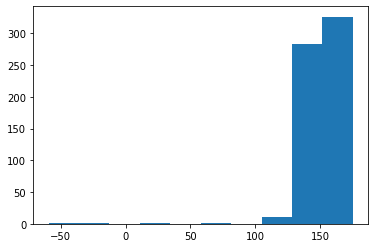

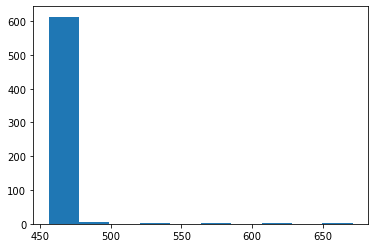

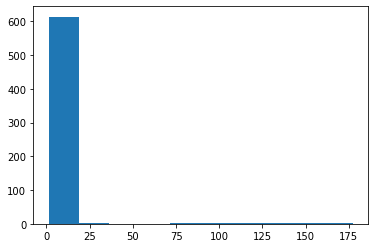

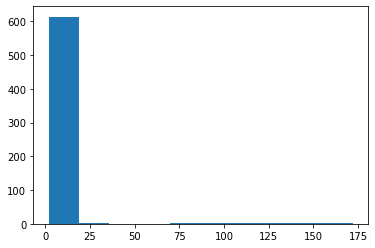

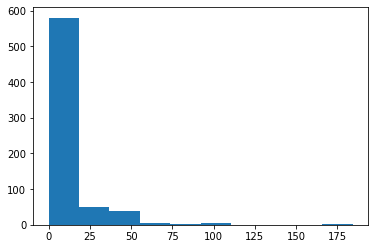

In [81]:
import matplotlib.pyplot as plt
# Plot histogram
# Select the columns corresponding to top missing features 
features = X_train[['feature_73', 'feature_74', 'feature_347', 'feature_346', 'feature_520']]

# Plot each feature separately
for column in features.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(features[column])
    plt.show()

In [153]:
from sklearn.linear_model import LogisticRegression

# Train a simple logistic regressor
logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [154]:
predictions_train = logistic_regressor.predict(X_train_scaled)

In [155]:
prediction_test= logistic_regressor.predict(X_test_scaled)

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
# Get the accuracy on the train set
accuracy_score(y_train, predictions_train) 

0.99122106943336

In [158]:
# Get the accuracy on the test set
accuracy_score(y_test, prediction_test) 

0.8980891719745223

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test)


In [160]:
cm

array([[277,  16],
       [ 16,   5]], dtype=int64)

In [165]:
from sklearn.model_selection import GridSearchCV

In [178]:
parameters={
    'max_depth': [3,15,10,20, None],
    'max_features': ['sqrt','log2',100,0.5],
    'n_estimators': [50,100,200]
}

In [182]:
# Perform the grid search and score it with grid search
random_search = GridSearchCV(RandomForestClassifier(), parameters)
random_search.fit(X_train_imputed, y_train)
random_search.best_params_

{'max_depth': 20, 'max_features': 100, 'n_estimators': 200}

In [183]:
random_search.best_score_

0.9345625498007968

In [184]:
predictions_test = random_search.predict(X_test_imputed)
accuracy_score(y_test, predictions_test) 

0.9299363057324841

In [188]:
cm

array([[277,  16],
       [ 16,   5]], dtype=int64)